In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import os
from subprocess import check_output
from wordcloud import WordCloud,STOPWORDS

In [2]:
you=pd.read_csv("youtube.csv")

In [3]:
you.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  Today we find out if Link is a Nickelback amat...  
4  I know it's been a while since we did this sho...

In [4]:
you.shape

(40949, 16)

In [5]:
you.nunique()

video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64

In [6]:
all(you.iloc[:,0].isin(you.index.values))

False

In [7]:
you.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [8]:
you.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [9]:
you.head(2)

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   

                                               title    channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE     CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   

                                                tags    views  likes  \
0                                    SHANtell martin   748374  57527   
1  last week tonight trump presidency|"last week ...  2418783  97185   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...

In [10]:
you["likes_log"]=np.log(you["likes"]+1)

In [11]:
you.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  likes_log  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  10.960027  
1  One year after the presidential election, John...  11.484382  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  11.891595  
3  Today we find out if Link is a Nickelback amat...   9.227492  
4  I know it's been a while since we did this sho...  11.792343

In [12]:
you.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  likes_log  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  10.960027  
1  One year after the presidential election, John...  11.484382  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  11.891595  
3  Today we find out if Link is a Nickelback amat...   9.227492  
4  I know it's been a while since we did this sho...  11.792343

In [13]:
you["views_log"]=np.log(you["views"]+1)

In [14]:
you.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  likes_log  views_log  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  10.960027  13.525659  
1  One year after the presidential election, John...  11.484382  14.698775  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  11.891595  14.975981  
3  Today we find out if Link is a Nickelback amat...   9.227492  12.745978  
4  I know it's been a while since we did this sho...  11.792343  14.555413

In [15]:
g=np.log(you["likes"]+1)

In [16]:
g

0        10.960027
1        11.484382
2        11.891595
3         9.227492
4        11.792343
           ...    
40944    10.549569
40945    11.002250
40946    10.780393
40947    12.170228
40948    12.785715
Name: likes, Length: 40949, dtype: float64

In [17]:
you["dislikes_log"]=np.log(you["dislikes"]+1)

In [18]:
you.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  likes_log  views_log  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  10.960027  13.525659   
1  One year after the presidential election, John...  11.484382  14.698775   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  11.891595  14.975981   
3  Today we find out if Link is a Nickelback amat...   9.227492  12.745978   
4  I know it's been a while since we did this sho...  11.792343  14.555413   

   dislikes_log  
0      7.995307  
1      8.723719  
2      8.582981  
3      6.502790  
4      7.595890

In [19]:
you["comment_count_log"]=np.log(you["comment_count"]+1)

In [20]:
you.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  likes_log  views_log  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  10.960027  13.525659   
1  One year after the presidential election, John...  11.484382  14.698775   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  11.891595  14.975981   
3  Today we find out if Link is a Nickelback amat...   9.227492  12.745978   
4  I know it's been a while since we did this sho...  11.792343  14.555413   

   dislikes_log  comment_count_log  
0      7.995307           9.677528  
1      8.723719           9.449672  
2      8.582981           9.009692  
3      6.502790           7.671827  
4      7.595890           9.771041

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(111)
g1 = sns.histplot(you['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)



Text(0.5, 1.0, 'VIEWS LOG DISTRIBUITION')

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
you.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'likes_log', 'views_log',
       'dislikes_log', 'comment_count_log'],
      dtype='object')

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(221)
q=sns.distplot(you['views_log'])
q.set_title("views log distribution",fontsize=12)


plt.subplot(222)
q1=sns.distplot(you["comment_count_log"],color="green")
q1.set_title("comments log distribution",fontsize=12)



plt.subplot(223)
q2=sns.distplot(you["likes_log"],color="pink")
q2.set_title("likes log distribution",fontsize=12)

plt.subplot(224)
q3=sns.distplot(you["dislikes_log"],color="skyblue")
q3.set_title("dislikes log distribution",fontsize=12)

plt.subplots_adjust(wspace= 0.2,hspace= 0.4,top=0.9)
plt.show()

In [25]:
print("view quantities")
print(you["views"].quantile([.01,.25,.5,.75,.99]))


view quantities
0.01        4209.84
0.25      242329.00
0.50      681861.00
0.75     1823157.00
0.99    29917344.32
Name: views, dtype: float64


In [26]:
print("view quantities")
print(you["views"].quantile([0.01,0.25,0.5,0.75,0.99]))
print(" ")
print("likes quantites")
print(you["likes"].quantile([0.01,0.25,0.5,0.75,0.99]))
print()
print("dislikes quantites")
print(you["dislikes"].quantile([0.01,0.25,0.5,0.75,0.99]))
print()
print("comment quantites")
print(you["comment_count"].quantile([0.01,0.25,0.5,0.75,0.99]))
print()

view quantities
0.01        4209.84
0.25      242329.00
0.50      681861.00
0.75     1823157.00
0.99    29917344.32
Name: views, dtype: float64
 
likes quantites
0.01        15.00
0.25      5424.00
0.50     18091.00
0.75     55417.00
0.99    923015.92
Name: likes, dtype: float64

dislikes quantites
0.01        1.00
0.25      202.00
0.50      631.00
0.75     1938.00
0.99    43562.28
Name: dislikes, dtype: float64

comment quantites
0.01         0.0
0.25       614.0
0.50      1856.0
0.75      5755.0
0.99    100603.6
Name: comment_count, dtype: float64



In [27]:
you.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'likes_log', 'views_log',
       'dislikes_log', 'comment_count_log'],
      dtype='object')

In [28]:
you["category_id"].unique()

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43],
      dtype=int64)

In [29]:
you.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  likes_log  views_log  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  10.960027  13.525659   
1  One year after the presidential election, John...  11.484382  14.698775   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  11.891595  14.975981   
3  Today we find out if Link is a Nickelback amat...   9.227492  12.745978   
4  I know it's been a while since we did this sho...  11.792343  14.555413   

   dislikes_log  comment_count_log  
0      7.995307           9.677528  
1      8.723719           9.449672  
2      8.582981           9.009692  
3      6.502790           7.671827  
4      7.595890           9.771041

In [30]:
you["tags"].unique()

array(['SHANtell martin',
       'last week tonight trump presidency|"last week tonight donald trump"|"john oliver trump"|"donald trump"',
       'racist superman|"rudy"|"mancuso"|"king"|"bach"|"racist"|"superman"|"love"|"rudy mancuso poo bear black white official music video"|"iphone x by pineapple"|"lelepons"|"hannahstocking"|"rudymancuso"|"inanna"|"anwar"|"sarkis"|"shots"|"shotsstudios"|"alesso"|"anitta"|"brazil"|"Getting My Driver\'s License | Lele Pons"',
       ...,
       'The Late Late Show|"Late Late Show"|"James Corden"|"Corden"|"late night"|"late night show"|"comedy"|"comedian"|"celebrity"|"celeb"|"celebrities"|"CBS"|"joke"|"jokes"|"funny"|"funny videos"|"funny video"|"humor"|"hollywood"|"famous"|"Drop the Mic"|"Ashton Kutcher"|"Sean Diddy Combs"|"Segment"|"Game"|"Music"|"Recurring"|"Evergreen"',
       'bon appetit|"burgers"|"cheeseburgers"|"how to cook"|"test kitchen"|"cast iron"|"smashburgers"|"how to make cheeseburgers"|"how to make smashburgers"|"how to make a smashburg

In [31]:
you.groupby(["category_id","tags"]).size().reset_index(name="count")

category_id                                               tags  count
0               1  A Wrinkle in Time|"Wrinkle in Time"|"Disney"|"...      4
1               1  Amazon Studios|"Amazon"|"amazon prime"|"amazon...     10
2               1  Amazon Studios|"Amazon"|"amazon prime"|"amazon...      7
3               1  Amazon Studios|"Amazon"|"amazon prime"|"amazon...     12
4               1  Amazon Studios|"Amazon"|"amazon prime"|"amazon...      7
...           ...                                                ...    ...
6085           29  Навальный|"Навальный2018"|"Фонд борьбы с корру...      1
6086           43  Apple|"Homepod"|"smart home"|"Google Home"|"Am...      5
6087           43  Apple|"iPhone Slowdown"|"Apple Battery"|"Cultu...     11
6088           43  bleacher report|"br"|"nba"|"Stan Van Gundy"|"J...     25
6089           43  bleacher report|"br"|"nba"|"game of zones"|"go...     16

[6090 rows x 3 columns]

In [32]:
you["category_name"]=np.nan

In [33]:
you.loc[(you["category_id"]== 1),"category_name"]= "Film and Animation"

In [34]:
df_yout=you.copy()

In [35]:
df_yout['category_name'] = np.nan

df_yout.loc[(df_yout["category_id"] == 1),"category_name"] = 'Film and Animation'
df_yout.loc[(df_yout["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df_yout.loc[(df_yout["category_id"] == 10),"category_name"] = 'Music'
df_yout.loc[(df_yout["category_id"] == 15),"category_name"] = 'Pets and Animals'
df_yout.loc[(df_yout["category_id"] == 17),"category_name"] = 'Sport'
df_yout.loc[(df_yout["category_id"] == 19),"category_name"] = 'Travel and Events'
df_yout.loc[(df_yout["category_id"] == 20),"category_name"] = 'Gaming'
df_yout.loc[(df_yout["category_id"] == 22),"category_name"] = 'People and Blogs'
df_yout.loc[(df_yout["category_id"] == 23),"category_name"] = 'Comedy'
df_yout.loc[(df_yout["category_id"] == 24),"category_name"] = 'Entertainment'
df_yout.loc[(df_yout["category_id"] == 25),"category_name"] = 'News and Politics'
df_yout.loc[(df_yout["category_id"] == 26),"category_name"] = 'How to and Style'
df_yout.loc[(df_yout["category_id"] == 27),"category_name"] = 'Education'
df_yout.loc[(df_yout["category_id"] == 28),"category_name"] = 'Science and Technology'
df_yout.loc[(df_yout["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df_yout.loc[(df_yout["category_id"] == 25),"category_name"] = 'News & Politics'

In [36]:
you.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...                                  thumbnail_link  \
0      2966  ...  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146  ...  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339  ...  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666  ...  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989  ...  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0             False             False                   False   
1             False             False                   False   
2             False             False                   False   
3             False             False                   False   
4             False             False                   False   

                                         description  likes_log  views_log  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  10.960027  13.525659   
1  One year after the presidential election, John...  11.484382  14.698775   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  11.891595  14.975981   
3  Today we find out if Link is a Nickelback amat...   9.227492  12.745978   
4  I know it's been a while since we did this sho...  11.792343  14.555413   

   dislikes_log  comment_count_log  category_name  
0      7.995307           9.677528            NaN  
1      8.723719           9.449672            NaN  
2      8.582981           9.009692            NaN  
3      6.502790           7.671827            NaN  
4      7.595890           9.771041            NaN  

[5 rows x 21 columns]

In [37]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...                                  thumbnail_link  \
0      2966  ...  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146  ...  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339  ...  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666  ...  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989  ...  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0             False             False                   False   
1             False             False                   False   
2             False             False                   False   
3             False             False                   False   
4             False             False                   False   

                                         description  likes_log  views_log  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  10.960027  13.525659   
1  One year after the presidential election, John...  11.484382  14.698775   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  11.891595  14.975981   
3  Today we find out if Link is a Nickelback amat...   9.227492  12.745978   
4  I know it's been a while since we did this sho...  11.792343  14.555413   

   dislikes_log  comment_count_log     category_name  
0      7.995307           9.677528  People and Blogs  
1      8.723719           9.449672     Entertainment  
2      8.582981           9.009692            Comedy  
3      6.502790           7.671827     Entertainment  
4      7.595890           9.771041     Entertainment  

[5 rows x 21 columns]

In [38]:
df_yout.loc[(df_yout["category_id"]== 43),"category_name"]= "mobile gadgets and game reports"


In [39]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...                                  thumbnail_link  \
0      2966  ...  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146  ...  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339  ...  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666  ...  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989  ...  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0             False             False                   False   
1             False             False                   False   
2             False             False                   False   
3             False             False                   False   
4             False             False                   False   

                                         description  likes_log  views_log  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  10.960027  13.525659   
1  One year after the presidential election, John...  11.484382  14.698775   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  11.891595  14.975981   
3  Today we find out if Link is a Nickelback amat...   9.227492  12.745978   
4  I know it's been a while since we did this sho...  11.792343  14.555413   

   dislikes_log  comment_count_log     category_name  
0      7.995307           9.677528  People and Blogs  
1      8.723719           9.449672     Entertainment  
2      8.582981           9.009692            Comedy  
3      6.502790           7.671827     Entertainment  
4      7.595890           9.771041     Entertainment  

[5 rows x 21 columns]

In [40]:
df_yout.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
likes_log                   0
views_log                   0
dislikes_log                0
comment_count_log           0
category_name               0
dtype: int64

customer name count
category_name
Entertainment                      9964
Music                              6472
How to and Style                   4146
Comedy                             3457
People and Blogs                   3210
News & Politics                    2487
Science and Technology             2401
Film and Animation                 2345
Sport                              2174
Education                          1656
Pets and Animals                    920
Gaming                              817
Travel and Events                   402
Cars and Vehicles                   384
Non Profits and Activism             57
mobile gadgets and game reports      57
Name: count, dtype: int64


Text(0.5, 0, 'category_names')

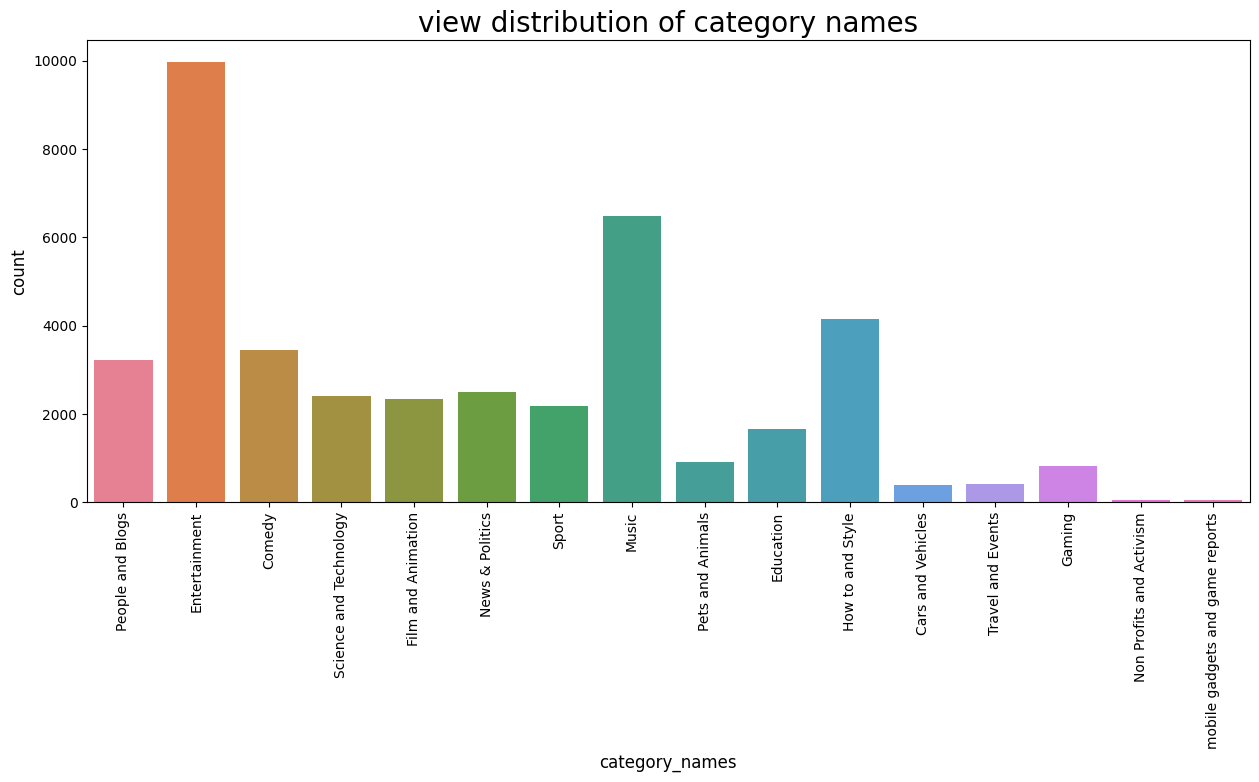

In [41]:
print("customer name count")
print(df_yout.category_name.value_counts())
plt.figure(figsize=(15,6))

g=sns.countplot(data=df_yout,x="category_name",palette="husl")
g.set_xticklabels(g.get_xticklabels(),rotation=90)

g.set_title("view distribution of category names",fontsize=20)
g.set_ylabel("count",fontsize=12)
g.set_xlabel("category_names",fontsize=12)


customer name count
category_name
Entertainment                      9964
Music                              6472
How to and Style                   4146
Comedy                             3457
People and Blogs                   3210
News & Politics                    2487
Science and Technology             2401
Film and Animation                 2345
Sport                              2174
Education                          1656
Pets and Animals                    920
Gaming                              817
Travel and Events                   402
Cars and Vehicles                   384
Non Profits and Activism             57
mobile gadgets and game reports      57
Name: count, dtype: int64


Text(0.5, 0, 'category_names')

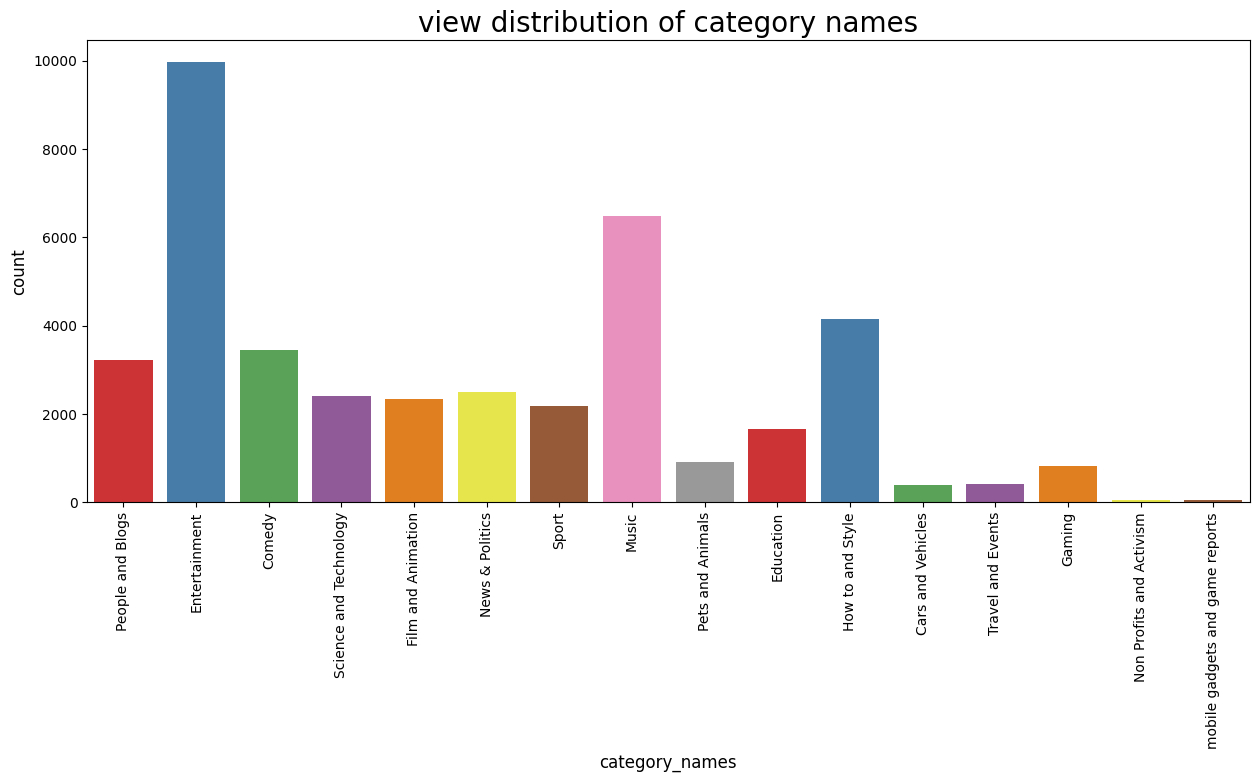

In [42]:
print("customer name count")
print(df_yout.category_name.value_counts())
plt.figure(figsize=(15,6))

g=sns.countplot(data=df_yout,x="category_name",palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=90)

g.set_title("view distribution of category names",fontsize=20)
g.set_ylabel("count",fontsize=12)
g.set_xlabel("category_names",fontsize=12)

Text(0, 0.5, 'Views(log)')

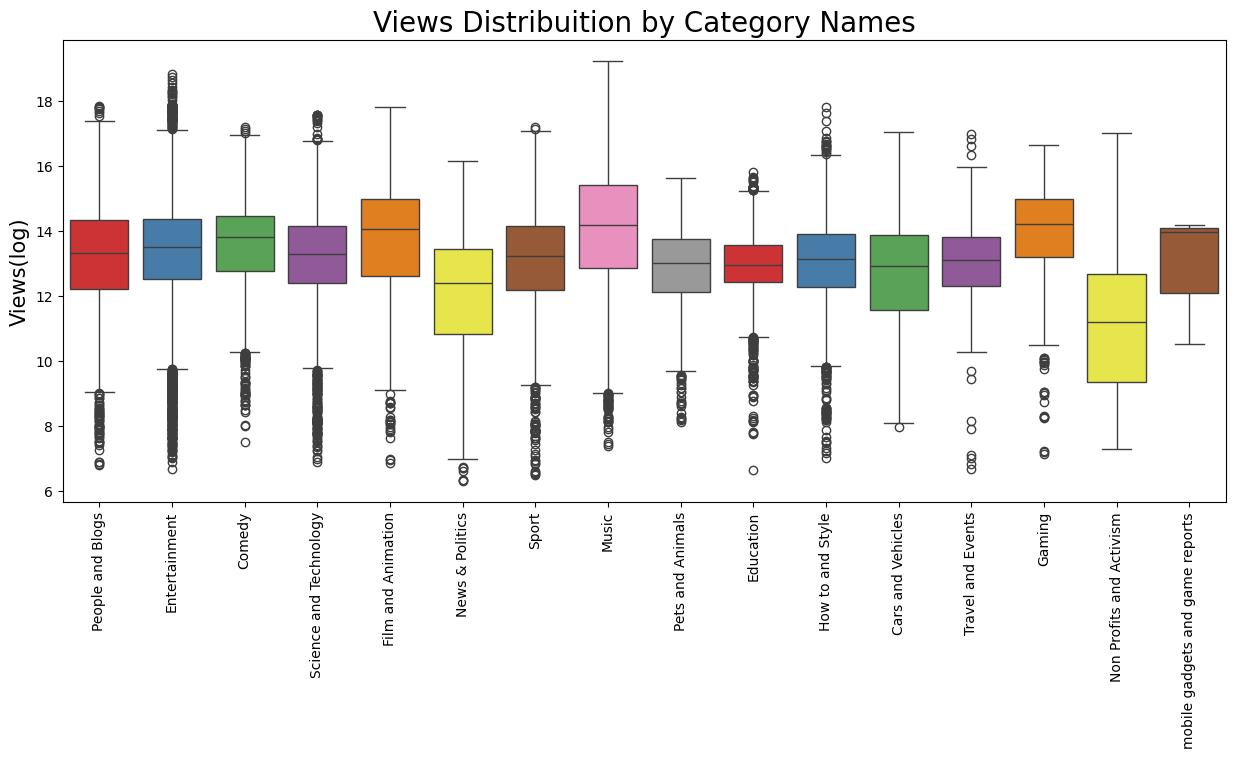

In [43]:
plt.figure(figsize=(15,6))
g1 = sns.boxplot(x='category_name', y='views_log' ,data=df_yout, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=90)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)


In [44]:
df_yout.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'likes_log', 'views_log',
       'dislikes_log', 'comment_count_log', 'category_name'],
      dtype='object')

category name count
category_name
Entertainment       9964
Music               6472
How to and Style    4146
Comedy              3457
People and Blogs    3210
Name: count, dtype: int64


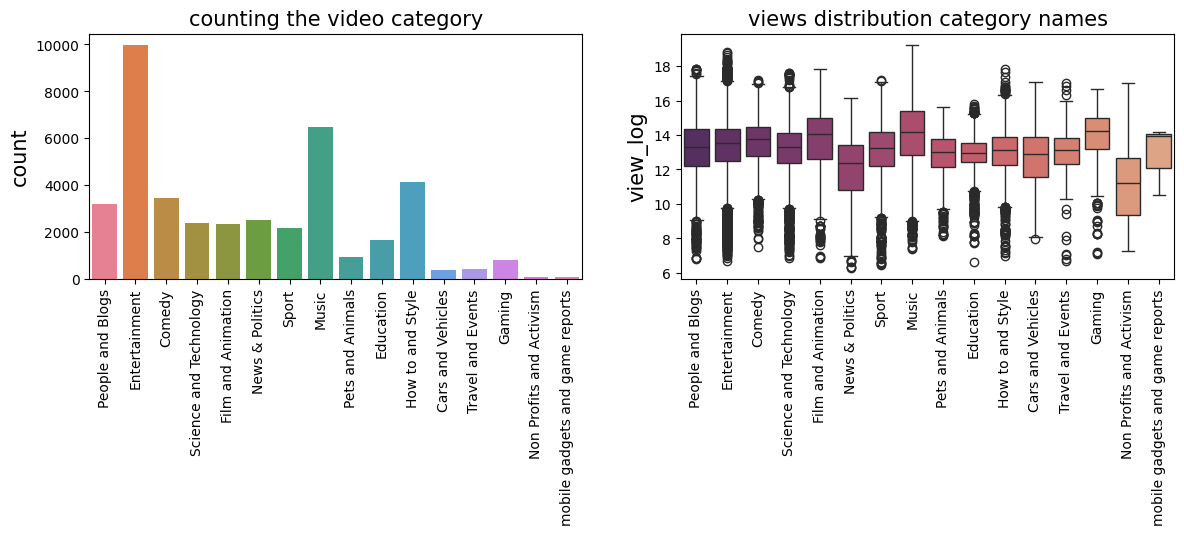

In [45]:
print("category name count")
print(df_yout["category_name"].value_counts()[:5])
plt.figure(figsize=(14,9))

plt.subplot(221)
g=sns.countplot(data=df_yout,x="category_name",palette="husl")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("counting the video category",fontsize=15)
g.set_xlabel("")
g.set_ylabel("count",fontsize=15)

plt.subplot(222)
g1=sns.boxplot(data=df_yout,x='category_name',y='views_log',palette="flare_r")
g1.set_xticklabels(g1.get_xticklabels(),rotation=45*2)
g1.set_title("views distribution category names",fontsize=15)
g1.set_xlabel("")
g1.set_ylabel("view_log",fontsize=15)

plt.subplots_adjust(hspace=0.9,top=0.9)
plt.show()

In [46]:
print("likes_log count")
plt.figure(figsize=(15,6))
w=sns.boxplot(data=df_yout,x="category_name",y="likes_log",palette="Greens_r")
plt.xticks(rotation=90,fontsize=12)
w.set_title("likes distribution category names",fontsize=15)
w.set_xlabel("category_names",fontsize=15)
w.set_ylabel("likes_log",fontsize=15)

likes_log count


Text(0, 0.5, 'likes_log')

dislikes_log count


Text(0, 0.5, 'dislikes_count')

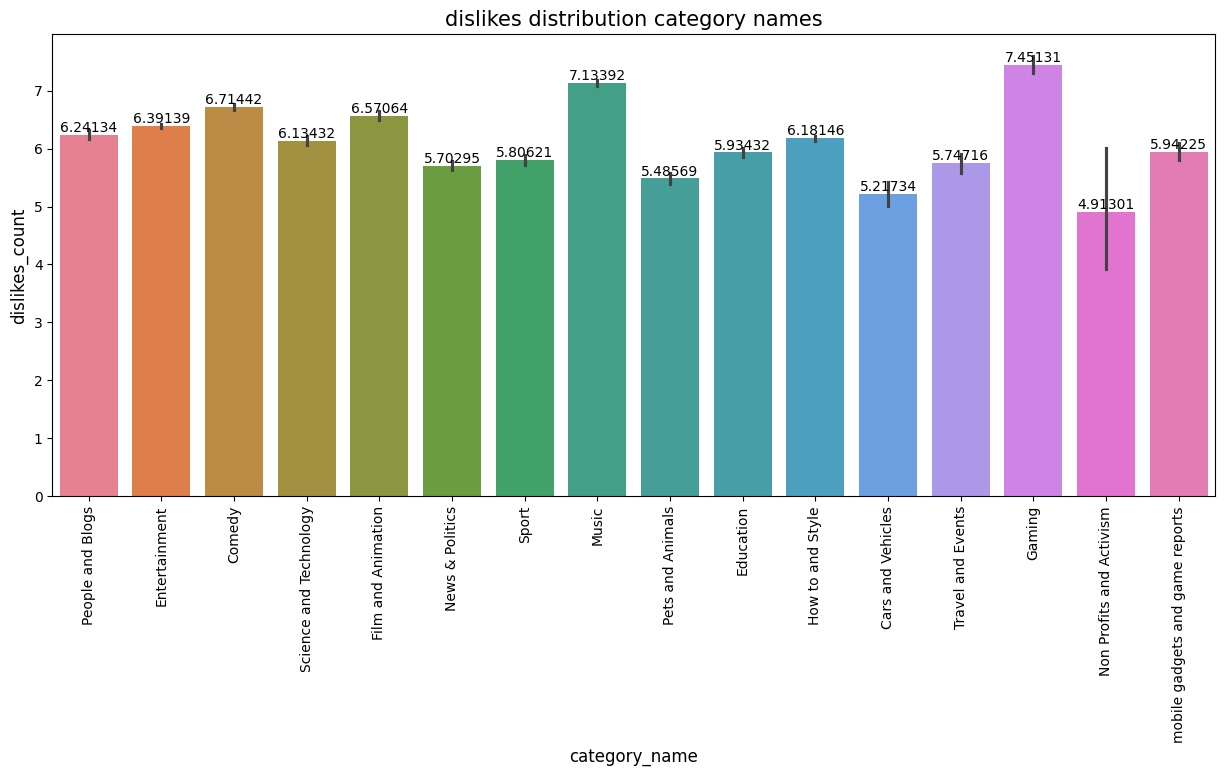

In [47]:
print("dislikes_log count")
plt.figure(figsize=(15,6))
d=sns.barplot(x="category_name",y="dislikes_log",data=df_yout,palette="husl")
for i in d.containers:
    d.bar_label(i)
d.tick_params("x",rotation=90)
    
d.set_title("dislikes distribution category names",fontsize=15)
d.set_xlabel("category_name",fontsize=12)
d.set_ylabel("dislikes_count",fontsize=12)


dislikes_log count


Text(0, 0.5, 'dislikes_count')

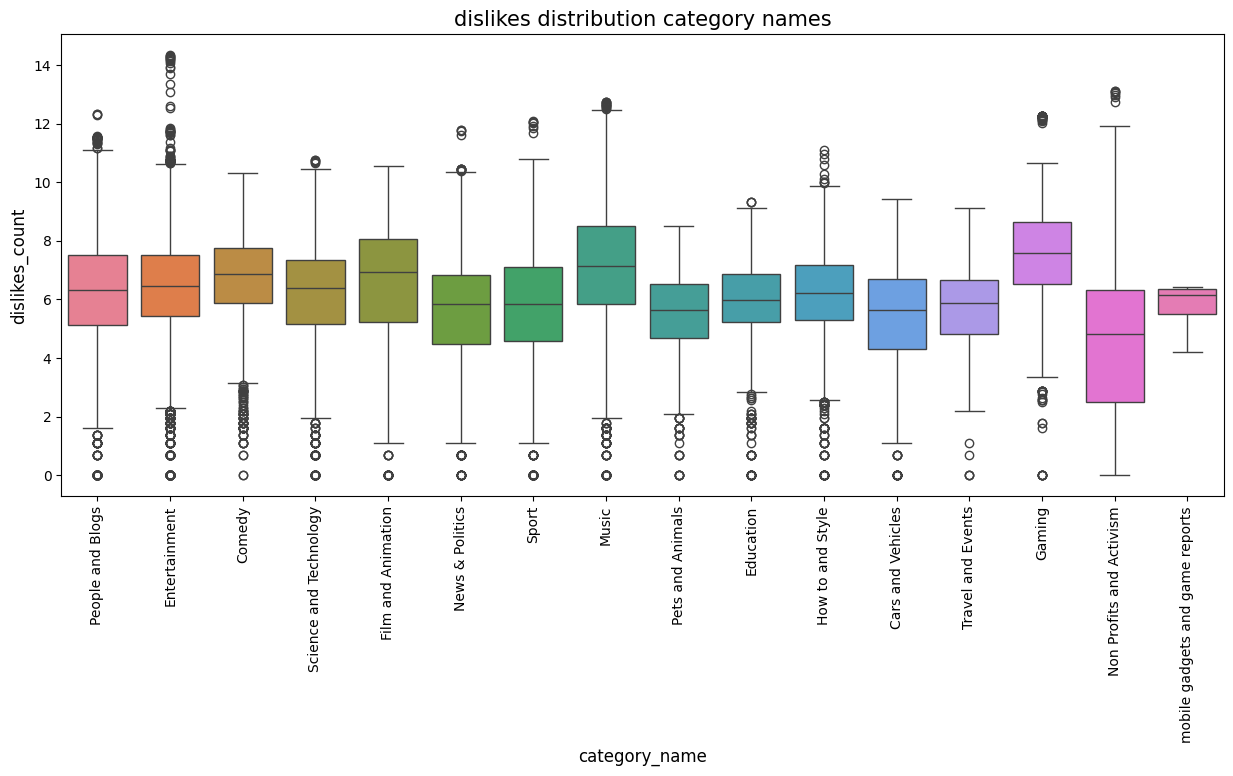

In [48]:
print("dislikes_log count")
plt.figure(figsize=(15,6))
d=sns.boxplot(x="category_name",y="dislikes_log",data=df_yout,palette="husl")

d.tick_params("x",rotation=90)
    
d.set_title("dislikes distribution category names",fontsize=15)
d.set_xlabel("category_name",fontsize=12)
d.set_ylabel("dislikes_count",fontsize=12)

In [49]:
df_yout.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'likes_log', 'views_log',
       'dislikes_log', 'comment_count_log', 'category_name'],
      dtype='object')

comments_log counts


Text(0, 0.5, 'comments_count')

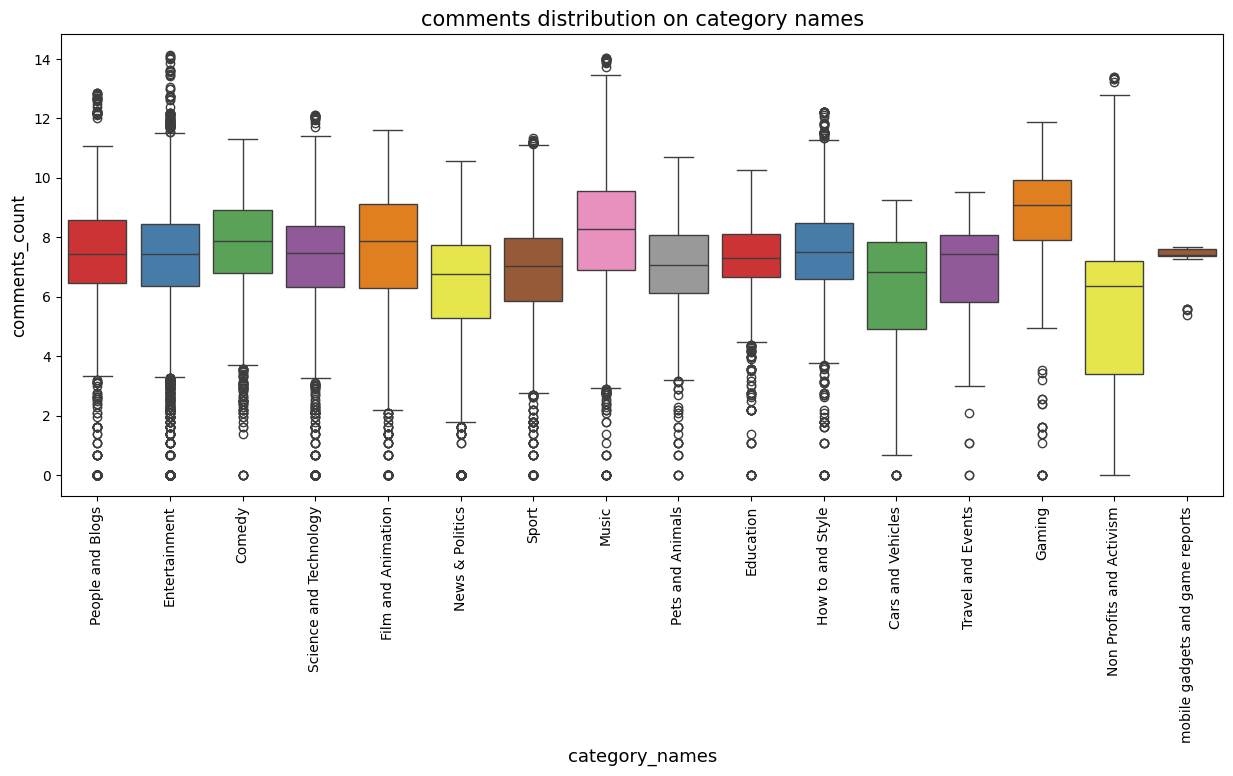

In [50]:
print("comments_log counts")
plt.figure(figsize=(15,6))
h=sns.boxplot(data=df_yout,x="category_name",y="comment_count_log",palette="Set1")
h.set_xticklabels(h.get_xticklabels(),rotation=90)
h.set_title("comments distribution on category names",fontsize=15)
h.set_xlabel("category_names",fontsize=13)
h.set_ylabel("comments_count",fontsize=12)

In [51]:
df_yout["likes_rate"]=(df_yout["likes"]/df_yout["views"])*100

In [52]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  comments_disabled ratings_disabled  video_error_or_removed  \
0      2966  ...              False            False                   False   
1      6146  ...              False            False                   False   
2      5339  ...              False            False                   False   
3       666  ...              False            False                   False   
4      1989  ...              False            False                   False   

                                         description  likes_log  views_log  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  10.960027  13.525659   
1  One year after the presidential election, John...  11.484382  14.698775   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  11.891595  14.975981   
3  Today we find out if Link is a Nickelback amat...   9.227492  12.745978   
4  I know it's been a while since we did this sho...  11.792343  14.555413   

   dislikes_log  comment_count_log     category_name  likes_rate  
0      7.995307           9.677528  People and Blogs    7.686932  
1      8.723719           9.449672     Entertainment    4.017930  
2      8.582981           9.009692            Comedy    4.575780  
3      6.502790           7.671827     Entertainment    2.964146  
4      7.595890           9.771041     Entertainment    6.309732  

[5 rows x 22 columns]

In [53]:
df_yout['dislike_rate'] =  (df_yout ['dislikes'] / df_yout['views']) * 100

In [54]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  ratings_disabled video_error_or_removed  \
0      2966  ...             False                  False   
1      6146  ...             False                  False   
2      5339  ...             False                  False   
3       666  ...             False                  False   
4      1989  ...             False                  False   

                                         description  likes_log  views_log  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  10.960027  13.525659   
1  One year after the presidential election, John...  11.484382  14.698775   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  11.891595  14.975981   
3  Today we find out if Link is a Nickelback amat...   9.227492  12.745978   
4  I know it's been a while since we did this sho...  11.792343  14.555413   

  dislikes_log  comment_count_log     category_name  likes_rate  dislike_rate  
0     7.995307           9.677528  People and Blogs    7.686932      0.396326  
1     8.723719           9.449672     Entertainment    4.017930      0.254095  
2     8.582981           9.009692            Comedy    4.575780      0.167292  
3     6.502790           7.671827     Entertainment    2.964146      0.194074  
4     7.595890           9.771041     Entertainment    6.309732      0.094907  

[5 rows x 23 columns]

In [55]:
df_yout.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'likes_log', 'views_log',
       'dislikes_log', 'comment_count_log', 'category_name', 'likes_rate',
       'dislike_rate'],
      dtype='object')

In [56]:
df_yout["comments_rate"]=df_yout["comment_count"]/df_yout["views"]  * 100

In [57]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  video_error_or_removed  \
0      2966  ...                   False   
1      6146  ...                   False   
2      5339  ...                   False   
3       666  ...                   False   
4      1989  ...                   False   

                                         description  likes_log  views_log  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  10.960027  13.525659   
1  One year after the presidential election, John...  11.484382  14.698775   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  11.891595  14.975981   
3  Today we find out if Link is a Nickelback amat...   9.227492  12.745978   
4  I know it's been a while since we did this sho...  11.792343  14.555413   

   dislikes_log comment_count_log     category_name  likes_rate  dislike_rate  \
0      7.995307          9.677528  People and Blogs    7.686932      0.396326   
1      8.723719          9.449672     Entertainment    4.017930      0.254095   
2      8.582981          9.009692            Comedy    4.575780      0.167292   
3      6.502790          7.671827     Entertainment    2.964146      0.194074   
4      7.595890          9.771041     Entertainment    6.309732      0.094907   

   comments_rate  
0       2.131822  
1       0.525181  
2       0.256342  
3       0.625350  
4       0.835890  

[5 rows x 24 columns]

In [58]:
df_yout.groupby(["category_name"])["comments_rate"].max()

category_name
Cars and Vehicles                   2.794639
Comedy                              8.201715
Education                           2.418150
Entertainment                       9.220823
Film and Animation                  4.445164
Gaming                              4.348280
How to and Style                   11.764299
Music                               6.004010
News & Politics                     7.034803
Non Profits and Activism            4.515473
People and Blogs                    6.730532
Pets and Animals                    3.496271
Science and Technology              6.765323
Sport                               2.493700
Travel and Events                   1.814516
mobile gadgets and game reports     1.295045
Name: comments_rate, dtype: float64

In [59]:
df_yout.groupby(["category_name"])["comments_rate"].min()

category_name
Cars and Vehicles                  0.000000
Comedy                             0.000000
Education                          0.000000
Entertainment                      0.000000
Film and Animation                 0.000000
Gaming                             0.000000
How to and Style                   0.000000
Music                              0.000000
News & Politics                    0.000000
Non Profits and Activism           0.000000
People and Blogs                   0.000000
Pets and Animals                   0.000000
Science and Technology             0.000000
Sport                              0.000000
Travel and Events                  0.000000
mobile gadgets and game reports    0.122029
Name: comments_rate, dtype: float64

In [60]:
df_yout.groupby(["category_name"])["comments_rate"].mean()

category_name
Cars and Vehicles                  0.349027
Comedy                             0.521854
Education                          0.450662
Entertainment                      0.390046
Film and Animation                 0.356170
Gaming                             0.745861
How to and Style                   0.588966
Music                              0.386095
News & Politics                    0.641634
Non Profits and Activism           0.730610
People and Blogs                   0.481863
Pets and Animals                   0.401464
Science and Technology             0.413567
Sport                              0.261113
Travel and Events                  0.356801
mobile gadgets and game reports    0.373246
Name: comments_rate, dtype: float64

In [61]:
df_yout.groupby(["category_name"])["comments_rate"].agg(["mean","min","max","sum"])

mean       min        max          sum
category_name                                                              
Cars and Vehicles                0.349027  0.000000   2.794639   134.026528
Comedy                           0.521854  0.000000   8.201715  1804.049432
Education                        0.450662  0.000000   2.418150   746.295702
Entertainment                    0.390046  0.000000   9.220823  3886.418312
Film and Animation               0.356170  0.000000   4.445164   835.217695
Gaming                           0.745861  0.000000   4.348280   609.368162
How to and Style                 0.588966  0.000000  11.764299  2441.852071
Music                            0.386095  0.000000   6.004010  2498.804947
News & Politics                  0.641634  0.000000   7.034803  1595.742734
Non Profits and Activism         0.730610  0.000000   4.515473    41.644755
People and Blogs                 0.481863  0.000000   6.730532  1546.781388
Pets and Animals                 0.401464  0.000000   3.496271   369.346600
Science and Technology           0.413567  0.000000   6.765323   992.974901
Sport                            0.261113  0.000000   2.493700   567.660517
Travel and Events                0.356801  0.000000   1.814516   143.434078
mobile gadgets and game reports  0.373246  0.122029   1.295045    21.275018

In [62]:
df_yout.groupby(["category_name"])["views"].agg(["mean","min","max","sum"])

mean    min        max          sum
category_name                                                               
Cars and Vehicles                1.355965e+06   2860   25244097    520690717
Comedy                           1.480308e+06   1807   29178096   5117426208
Education                        7.129408e+05    773    7349435   1180629990
Entertainment                    2.067883e+06    798  149376127  20604388195
Film and Animation               3.106250e+06    943   54863912   7284156721
Gaming                           2.620831e+06   1237   16935442   2141218625
How to and Style                 9.837301e+05   1107   54155921   4078545064
Music                            6.201003e+06   1591  225211923  40132892190
News & Politics                  5.925877e+05    549   10277358   1473765704
Non Profits and Activism         2.963884e+06   1456   24286474    168941392
People and Blogs                 1.531835e+06    884   56111957   4917191726
Pets and Animals                 8.311435e+05   3393    6187457    764651989
Science and Technology           1.452627e+06    983   42799458   3487756816
Sport                            2.025969e+06    658   29090799   4404456673
Travel and Events                8.546196e+05    789   23932421    343557084
mobile gadgets and game reports  9.035273e+05  36609    1445949     51501058

In [63]:
df_yout.groupby(["category_name"])["dislikes"].agg(["mean","min","max","sum"])

mean  min      max       sum
category_name                                                        
Cars and Vehicles                  632.838542    0    12290    243010
Comedy                            2091.521840    0    29865   7230391
Education                          816.408213    0    11270   1351972
Entertainment                     4314.297772    0  1674420  42987663
Film and Animation                2590.681450    0    38082   6075148
Gaming                           11241.696450    0   212976   9184466
How to and Style                  1320.284370    0    66632   5473899
Music                             7907.757726    0   343541  51179008
News & Politics                   1680.759550    0   132439   4180049
Non Profits and Activism         58076.859649    0   497847   3310381
People and Blogs                  3173.800935    0   228426  10187901
Pets and Animals                   573.238043    0     4899    527379
Science and Technology            1894.378176    0    47469   4548402
Sport                             2361.339006    0   176903   5133551
Travel and Events                  846.833333    0     9000    340427
mobile gadgets and game reports    429.964912   66      616     24508

In [64]:
df_yout.groupby(["category_name"])["likes"].agg(["mean","min","max","sum"])

mean  min      max         sum
category_name                                                           
Cars and Vehicles                 11056.395833    0    97030     4245656
Comedy                            62582.223315    6   865679   216346746
Education                         29745.031401    0   240989    49257772
Entertainment                     53243.325070    0  3093544   530516491
Film and Animation                70787.836247    0   922355   165997476
Gaming                            84502.183599    2   444203    69038284
How to and Style                  39286.076942    0   605954   162880075
Music                            218918.199011    0  5613827  1416838584
News & Politics                    7298.364696    0   163338    18151033
Non Profits and Activism         259923.614035    0  1988746    14815646
People and Blogs                  58135.825234    0  2032463   186615999
Pets and Animals                  21055.110870    6   178243    19370702
Science and Technology            34374.276551    0   564804    82532638
Sport                             45363.942502    0  1121217    98621211
Travel and Events                 12030.462687    3    42447     4836246
mobile gadgets and game reports   18993.666667  810    33261     1082639

In [65]:
df_yout.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'likes_log', 'views_log',
       'dislikes_log', 'comment_count_log', 'category_name', 'likes_rate',
       'dislike_rate', 'comments_rate'],
      dtype='object')

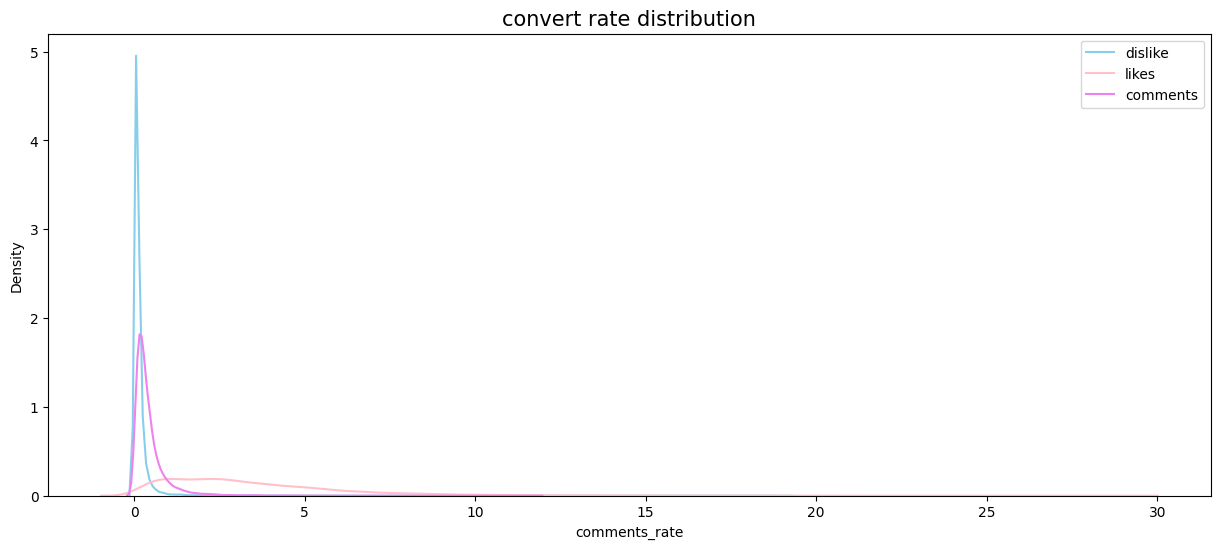

In [66]:
plt.figure(figsize=(15,6))
q1=sns.distplot(df_yout["dislike_rate"],color="skyblue",hist=False,label="dislike")
q1=sns.distplot(df_yout["likes_rate"],color="pink",hist=False,label="likes")
q1=sns.distplot(df_yout["comments_rate"],color="violet",hist=False,label="comments")
q1.set_title("convert rate distribution",fontsize=15)
plt.legend()
plt.show()


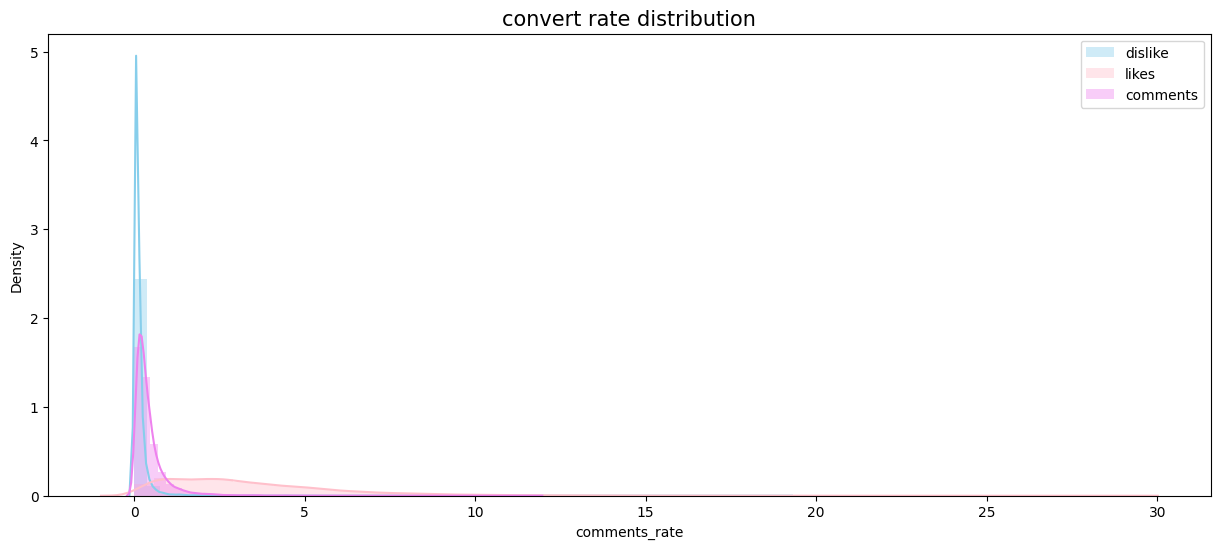

In [67]:
plt.figure(figsize=(15,6))
q1=sns.distplot(df_yout["dislike_rate"],color="skyblue",label="dislike")
q1=sns.distplot(df_yout["likes_rate"],color="pink",label="likes")
q1=sns.distplot(df_yout["comments_rate"],color="violet",label="comments")
q1.set_title("convert rate distribution",fontsize=15)
plt.legend()
plt.show()

In [68]:
df_yout.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'likes_log', 'views_log',
       'dislikes_log', 'comment_count_log', 'category_name', 'likes_rate',
       'dislike_rate', 'comments_rate'],
      dtype='object')

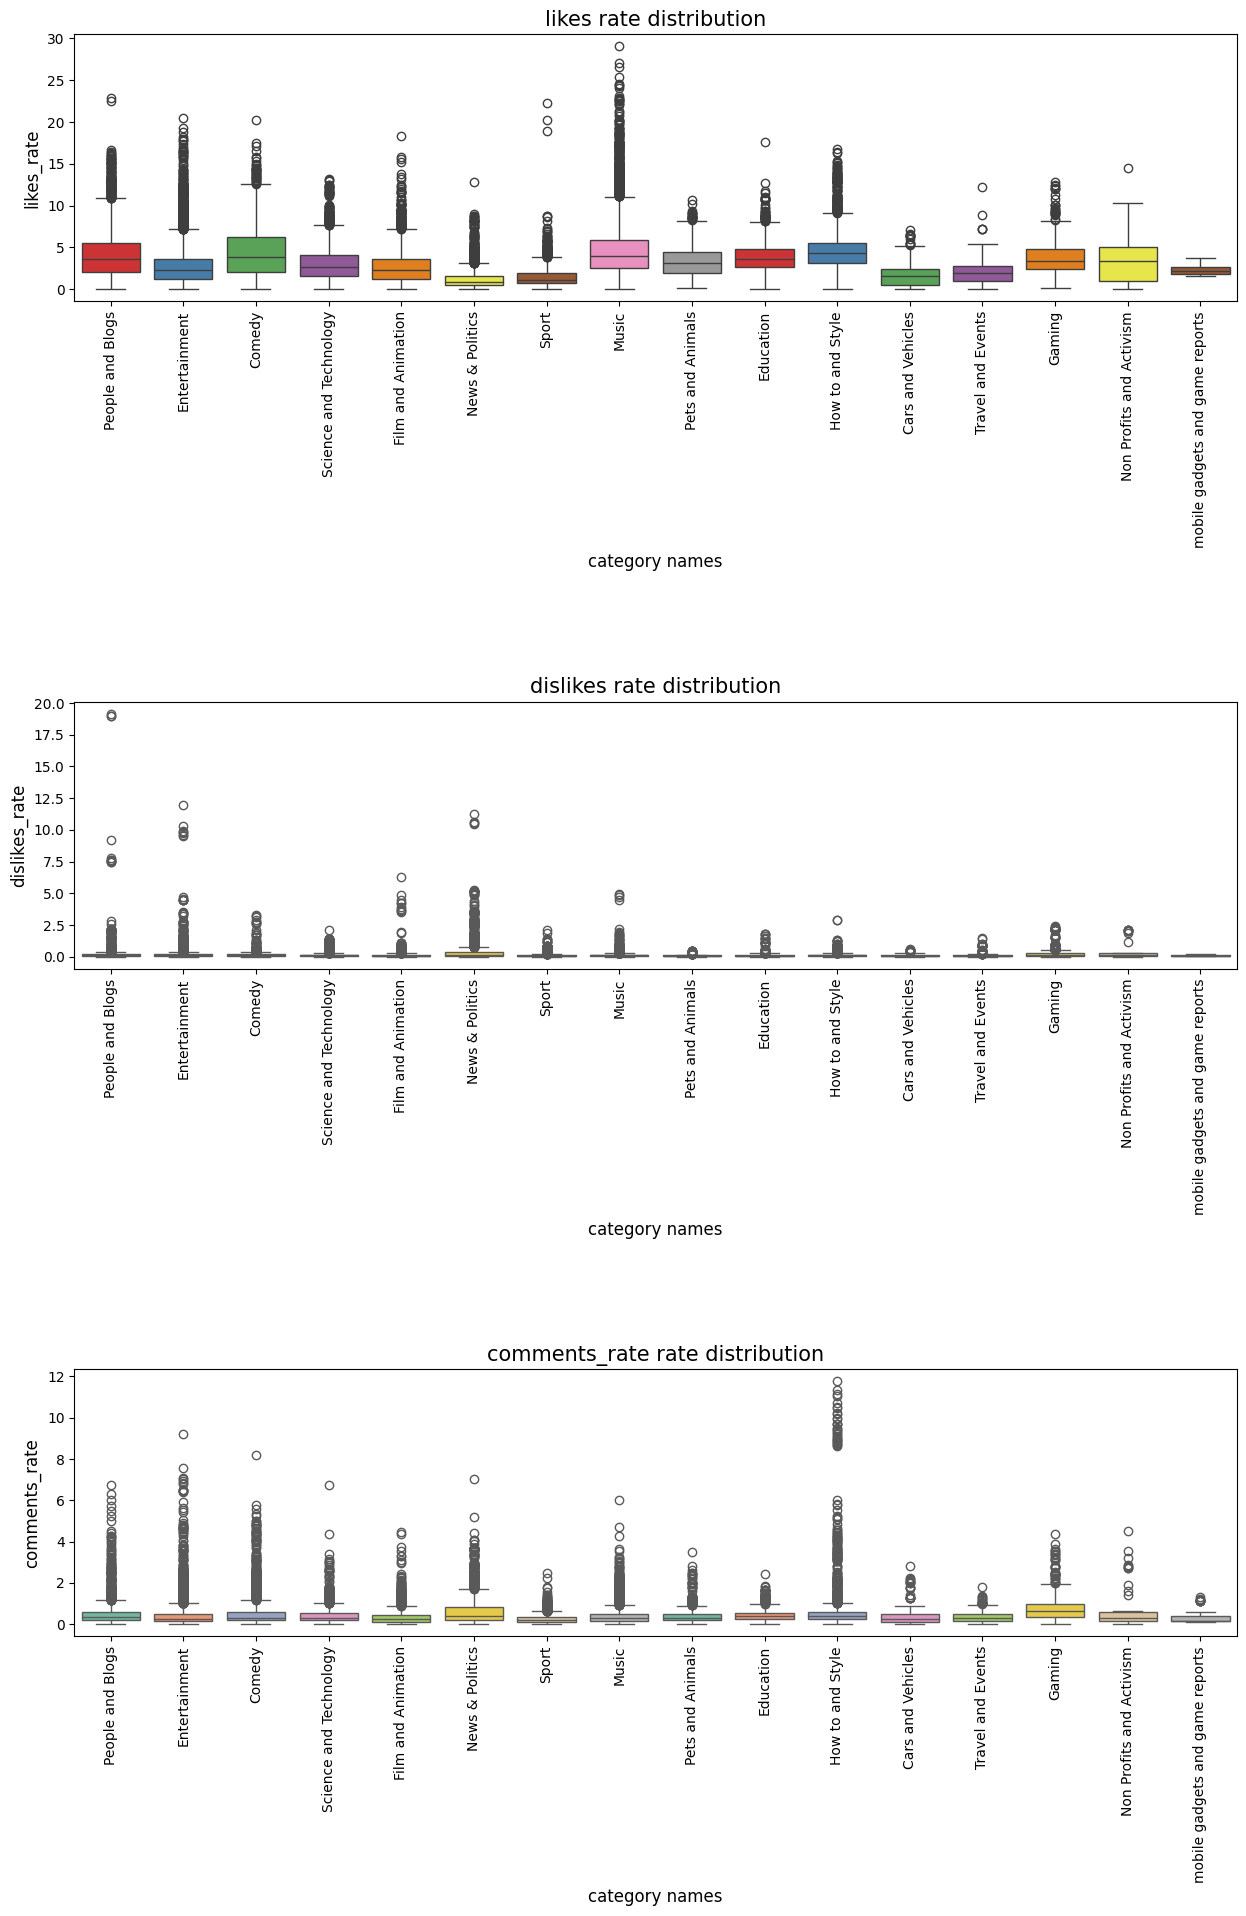

In [69]:
plt.figure(figsize=(15,18))
plt.subplot(311)
g=sns.boxplot(data=df_yout,x="category_name",y="likes_rate",palette="Set1")
plt.xticks(rotation=90)
g.set_title("likes rate distribution",fontsize=15)
g.set_xlabel("category names",fontsize=12)
g.set_ylabel("likes_rate",fontsize=12)

plt.subplot(312)
g1=sns.boxplot(data=df_yout,x="category_name",y="dislike_rate",palette="Set2")
plt.xticks(rotation=90)
g1.set_title("dislikes rate distribution",fontsize=15)
g1.set_xlabel("category names",fontsize=12)
g1.set_ylabel("dislikes_rate",fontsize=12)

plt.subplot(313)
g1=sns.boxplot(data=df_yout,x="category_name",y="comments_rate",palette="Set2")
plt.xticks(rotation=90)
g1.set_title("comments_rate rate distribution",fontsize=15)
g1.set_xlabel("category names",fontsize=12)
g1.set_ylabel("comments_rate",fontsize=12)


plt.subplots_adjust(wspace=2.0,hspace=1.5,top=1.0)
plt.show()




In [70]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  video_error_or_removed  \
0      2966  ...                   False   
1      6146  ...                   False   
2      5339  ...                   False   
3       666  ...                   False   
4      1989  ...                   False   

                                         description  likes_log  views_log  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  10.960027  13.525659   
1  One year after the presidential election, John...  11.484382  14.698775   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  11.891595  14.975981   
3  Today we find out if Link is a Nickelback amat...   9.227492  12.745978   
4  I know it's been a while since we did this sho...  11.792343  14.555413   

   dislikes_log comment_count_log     category_name  likes_rate  dislike_rate  \
0      7.995307          9.677528  People and Blogs    7.686932      0.396326   
1      8.723719          9.449672     Entertainment    4.017930      0.254095   
2      8.582981          9.009692            Comedy    4.575780      0.167292   
3      6.502790          7.671827     Entertainment    2.964146      0.194074   
4      7.595890          9.771041     Entertainment    6.309732      0.094907   

   comments_rate  
0       2.131822  
1       0.525181  
2       0.256342  
3       0.625350  
4       0.835890  

[5 rows x 24 columns]

In [71]:
df_yout.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'likes_log', 'views_log',
       'dislikes_log', 'comment_count_log', 'category_name', 'likes_rate',
       'dislike_rate', 'comments_rate'],
      dtype='object')

In [72]:
df_yout[["comments_disabled","ratings_disabled","video_error_or_removed"]]

comments_disabled  ratings_disabled  video_error_or_removed
0                  False             False                   False
1                  False             False                   False
2                  False             False                   False
3                  False             False                   False
4                  False             False                   False
...                  ...               ...                     ...
40944              False             False                   False
40945              False             False                   False
40946              False             False                   False
40947              False             False                   False
40948              False             False                   False

[40949 rows x 3 columns]

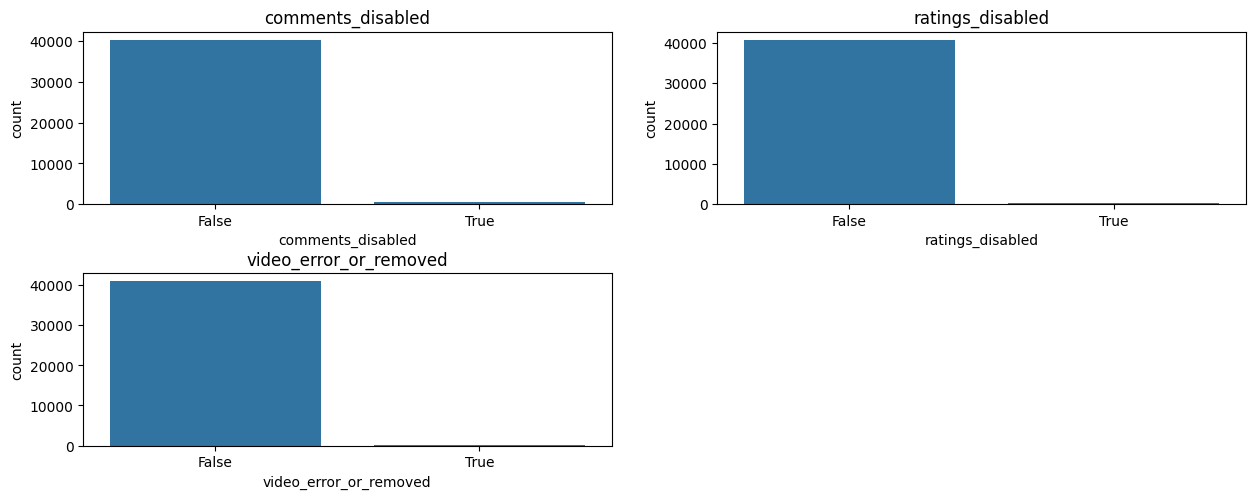

In [73]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(wspace=0.2,hspace=0.4,top=0.8)

plt.subplot(221)
w1=sns.countplot(data=df_yout,x="comments_disabled")
w1.set_title("comments_disabled",fontsize=12)

plt.subplot(222)
w2=sns.countplot(data=df_yout,x="ratings_disabled")
w2.set_title("ratings_disabled",fontsize=12)


plt.subplot(223)
w3=sns.countplot(data=df_yout,x="video_error_or_removed")
w3.set_title("video_error_or_removed",fontsize=12)

plt.show()

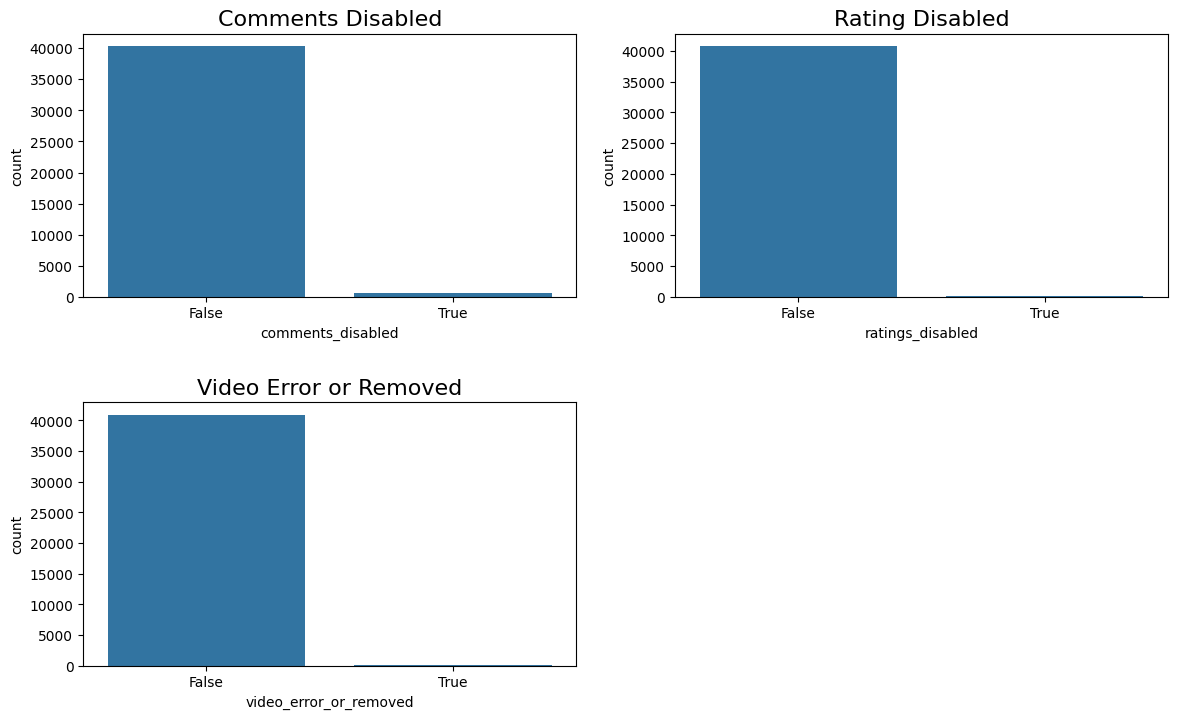

In [74]:
plt.figure(figsize = (14,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.subplot(2,2,1)
g = sns.countplot(x='comments_disabled', data=df_yout)
g.set_title("Comments Disabled", fontsize=16)

plt.subplot(2,2,2)
g1 = sns.countplot(x='ratings_disabled', data=df_yout)
g1.set_title("Rating Disabled", fontsize=16)

plt.subplot(2,2,3)
g2 = sns.countplot(x='video_error_or_removed', data=df_yout)
g2.set_title("Video Error or Removed", fontsize=16)
plt.show()

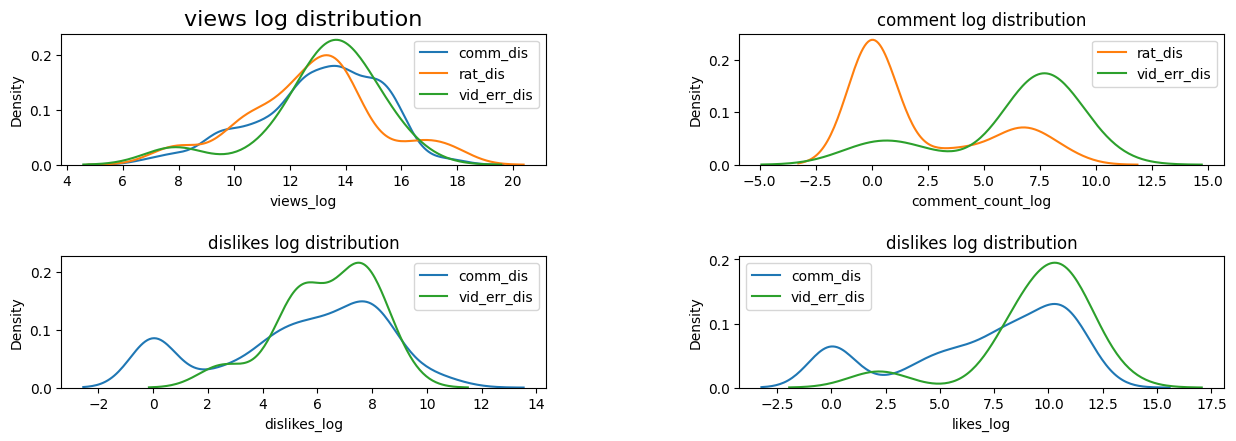

In [75]:
plt.figure(figsize=(15,6))
plt.subplot(221)
g1=sns.distplot(df_yout[df_yout["comments_disabled"]==True]["views_log"],hist=False,label="comm_dis")
g1=sns.distplot(df_yout[df_yout["ratings_disabled"]==True]["views_log"],hist=False,label="rat_dis")
g1=sns.distplot(df_yout[df_yout["video_error_or_removed"]==True]["views_log"],hist=False,label="vid_err_dis")
plt.legend()

g1.set_title("views log distribution",fontsize=16)


plt.subplot(222)
g2=sns.distplot(df_yout[df_yout["comments_disabled"]==True]["comment_count_log"],hist=False,label="comm_dis")
g2=sns.distplot(df_yout[df_yout["ratings_disabled"]==True]["comment_count_log"],hist=False,label="rat_dis")
g2=sns.distplot(df_yout[df_yout["video_error_or_removed"]==True]["comment_count_log"],hist=False,label="vid_err_dis")
g2.set_title("comment log distribution")
plt.legend()

plt.subplot(223)
g3=sns.distplot(df_yout[df_yout["comments_disabled"]==True]["dislikes_log"],hist=False,label="comm_dis")
g3=sns.distplot(df_yout[df_yout["ratings_disabled"]==True]["dislikes_log"],hist=False,label="rat_dis")
g3=sns.distplot(df_yout[df_yout["video_error_or_removed"]==True]["dislikes_log"],hist=False,label="vid_err_dis")
g3.set_title("dislikes log distribution")
plt.legend()

plt.subplot(224)
g4=sns.distplot(df_yout[df_yout["comments_disabled"]==True]["likes_log"],hist=False,label="comm_dis")
g4=sns.distplot(df_yout[df_yout["ratings_disabled"]==True]["likes_log"],hist=False,label="rat_dis")
g4=sns.distplot(df_yout[df_yout["video_error_or_removed"]==True]["likes_log"],hist=False,label="vid_err_dis")
g4.set_title("dislikes log distribution")

plt.subplots_adjust(wspace=0.4,hspace=0.7,top=0.7)
plt.legend()
plt.show()

In [76]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  video_error_or_removed  \
0      2966  ...                   False   
1      6146  ...                   False   
2      5339  ...                   False   
3       666  ...                   False   
4      1989  ...                   False   

                                         description  likes_log  views_log  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  10.960027  13.525659   
1  One year after the presidential election, John...  11.484382  14.698775   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  11.891595  14.975981   
3  Today we find out if Link is a Nickelback amat...   9.227492  12.745978   
4  I know it's been a while since we did this sho...  11.792343  14.555413   

   dislikes_log comment_count_log     category_name  likes_rate  dislike_rate  \
0      7.995307          9.677528  People and Blogs    7.686932      0.396326   
1      8.723719          9.449672     Entertainment    4.017930      0.254095   
2      8.582981          9.009692            Comedy    4.575780      0.167292   
3      6.502790          7.671827     Entertainment    2.964146      0.194074   
4      7.595890          9.771041     Entertainment    6.309732      0.094907   

   comments_rate  
0       2.131822  
1       0.525181  
2       0.256342  
3       0.625350  
4       0.835890  

[5 rows x 24 columns]

In [77]:
df_yout.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'likes_log', 'views_log',
       'dislikes_log', 'comment_count_log', 'category_name', 'likes_rate',
       'dislike_rate', 'comments_rate'],
      dtype='object')

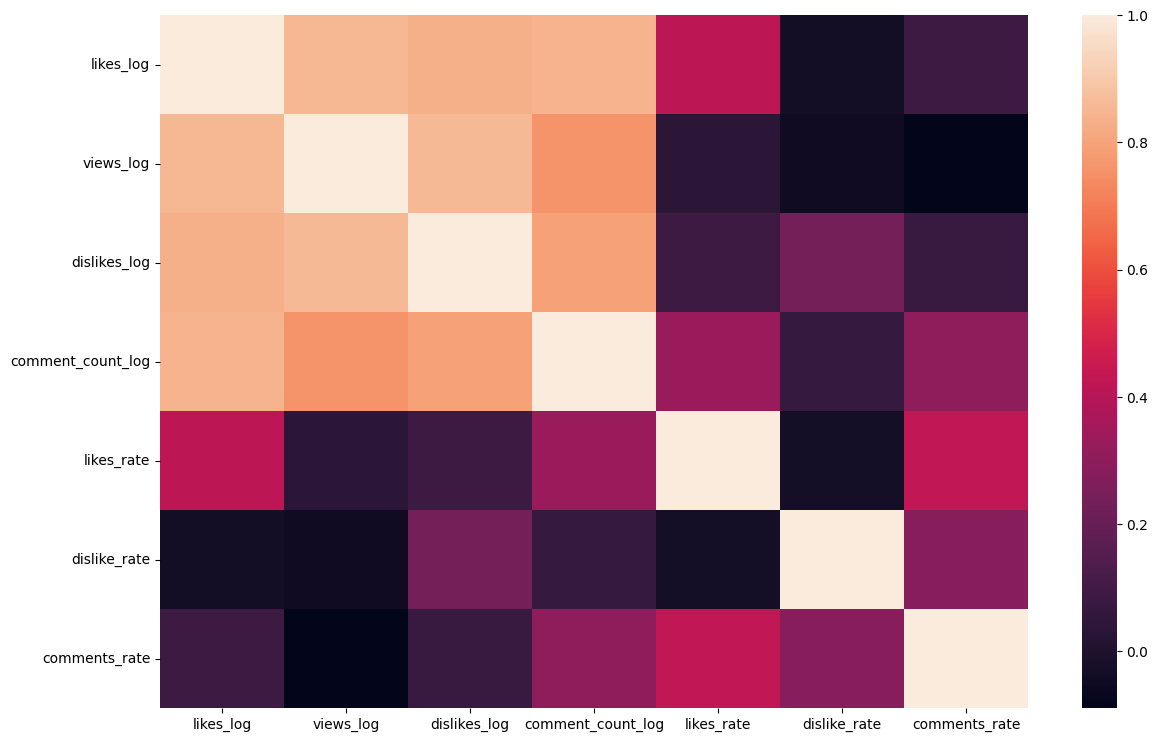

In [78]:
plt.figure(figsize=(14,9))
sns.heatmap(df_yout[['likes_log', 'views_log',
       'dislikes_log', 'comment_count_log' , 'likes_rate',
       'dislike_rate', 'comments_rate']].corr(),annot=False)
plt.show()

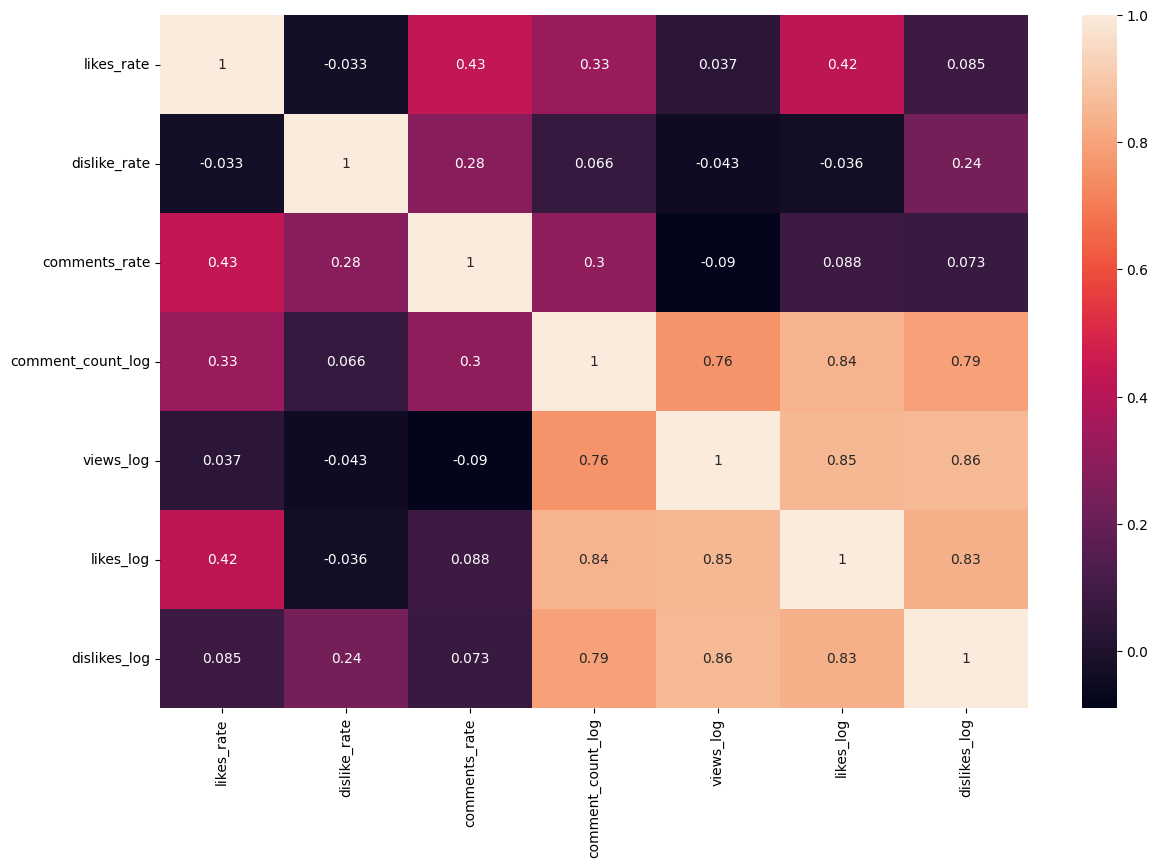

In [79]:
plt.figure(figsize=(14,9))
sns.heatmap(df_yout[['likes_rate', 'dislike_rate', 'comments_rate', 'comment_count_log',
         'views_log','likes_log','dislikes_log']].corr(), annot=True)

plt.show()

In [80]:
!pip install nltk

In [81]:
!pip install spacy 

In [82]:
import string
import re    #for regex
import nltk

from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   

In [83]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [84]:
df_yout["countword"]=df_yout["title"].apply(lambda x:len(str(x).split()))

In [85]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...                                        description  \
0      2966  ...  SHANTELL'S CHANNEL - https://www.youtube.com/s...   
1      6146  ...  One year after the presidential election, John...   
2      5339  ...  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...   
3       666  ...  Today we find out if Link is a Nickelback amat...   
4      1989  ...  I know it's been a while since we did this sho...   

   likes_log  views_log  dislikes_log  comment_count_log     category_name  \
0  10.960027  13.525659      7.995307           9.677528  People and Blogs   
1  11.484382  14.698775      8.723719           9.449672     Entertainment   
2  11.891595  14.975981      8.582981           9.009692            Comedy   
3   9.227492  12.745978      6.502790           7.671827     Entertainment   
4  11.792343  14.555413      7.595890           9.771041     Entertainment   

   likes_rate  dislike_rate  comments_rate  countword  
0    7.686932      0.396326       2.131822          7  
1    4.017930      0.254095       0.525181         10  
2    4.575780      0.167292       0.256342         10  
3    2.964146      0.194074       0.625350          5  
4    6.309732      0.094907       0.835890          5  

[5 rows x 25 columns]

In [86]:
df_yout['count_word_tags']=df_yout["tags"].apply(lambda x: len(str(x).split()))

In [87]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  likes_log  views_log  dislikes_log  comment_count_log  \
0      2966  ...  10.960027  13.525659      7.995307           9.677528   
1      6146  ...  11.484382  14.698775      8.723719           9.449672   
2      5339  ...  11.891595  14.975981      8.582981           9.009692   
3       666  ...   9.227492  12.745978      6.502790           7.671827   
4      1989  ...  11.792343  14.555413      7.595890           9.771041   

      category_name likes_rate  dislike_rate  comments_rate  countword  \
0  People and Blogs   7.686932      0.396326       2.131822          7   
1     Entertainment   4.017930      0.254095       0.525181         10   
2            Comedy   4.575780      0.167292       0.256342         10   
3     Entertainment   2.964146      0.194074       0.625350          5   
4     Entertainment   6.309732      0.094907       0.835890          5   

   count_word_tags  
0                2  
1               12  
2               19  
3               34  
4                4  

[5 rows x 26 columns]

In [88]:
df_yout["count_unique_word"]=df_yout["title"].apply(lambda x:len(set(str(x).split())))

In [89]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  views_log dislikes_log  comment_count_log     category_name  \
0      2966  ...  13.525659     7.995307           9.677528  People and Blogs   
1      6146  ...  14.698775     8.723719           9.449672     Entertainment   
2      5339  ...  14.975981     8.582981           9.009692            Comedy   
3       666  ...  12.745978     6.502790           7.671827     Entertainment   
4      1989  ...  14.555413     7.595890           9.771041     Entertainment   

   likes_rate dislike_rate  comments_rate  countword  count_word_tags  \
0    7.686932     0.396326       2.131822          7                2   
1    4.017930     0.254095       0.525181         10               12   
2    4.575780     0.167292       0.256342         10               19   
3    2.964146     0.194074       0.625350          5               34   
4    6.309732     0.094907       0.835890          5                4   

   count_unique_word  
0                  7  
1                 10  
2                 10  
3                  5  
4                  5  

[5 rows x 27 columns]

In [90]:
df_yout['count_unique_word_tags']=df_yout["tags"].apply(lambda x: len(set(str(x).split())))

In [91]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  dislikes_log comment_count_log     category_name  \
0      2966  ...      7.995307          9.677528  People and Blogs   
1      6146  ...      8.723719          9.449672     Entertainment   
2      5339  ...      8.582981          9.009692            Comedy   
3       666  ...      6.502790          7.671827     Entertainment   
4      1989  ...      7.595890          9.771041     Entertainment   

   likes_rate  dislike_rate comments_rate  countword  count_word_tags  \
0    7.686932      0.396326      2.131822          7                2   
1    4.017930      0.254095      0.525181         10               12   
2    4.575780      0.167292      0.256342         10               19   
3    2.964146      0.194074      0.625350          5               34   
4    6.309732      0.094907      0.835890          5                4   

   count_unique_word  count_unique_word_tags  
0                  7                       2  
1                 10                      10  
2                 10                      19  
3                  5                      28  
4                  5                       4  

[5 rows x 28 columns]

In [92]:
df_yout["count_letter"]=df_yout["title"].apply(lambda x:len(str(x)))

In [93]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  comment_count_log     category_name  likes_rate  \
0      2966  ...           9.677528  People and Blogs    7.686932   
1      6146  ...           9.449672     Entertainment    4.017930   
2      5339  ...           9.009692            Comedy    4.575780   
3       666  ...           7.671827     Entertainment    2.964146   
4      1989  ...           9.771041     Entertainment    6.309732   

   dislike_rate  comments_rate countword  count_word_tags  count_unique_word  \
0      0.396326       2.131822         7                2                  7   
1      0.254095       0.525181        10               12                 10   
2      0.167292       0.256342        10               19                 10   
3      0.194074       0.625350         5               34                  5   
4      0.094907       0.835890         5                4                  5   

   count_unique_word_tags  count_letter  
0                       2            34  
1                      10            62  
2                      19            53  
3                      28            32  
4                       4            24  

[5 rows x 29 columns]

In [94]:
df_yout['count_letters_tags']=df_yout["tags"].apply(lambda x: len(str(x)))


In [95]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...     category_name likes_rate  dislike_rate  comments_rate  \
0      2966  ...  People and Blogs   7.686932      0.396326       2.131822   
1      6146  ...     Entertainment   4.017930      0.254095       0.525181   
2      5339  ...            Comedy   4.575780      0.167292       0.256342   
3       666  ...     Entertainment   2.964146      0.194074       0.625350   
4      1989  ...     Entertainment   6.309732      0.094907       0.835890   

   countword count_word_tags  count_unique_word  count_unique_word_tags  \
0          7               2                  7                       2   
1         10              12                 10                      10   
2         10              19                 10                      19   
3          5              34                  5                      28   
4          5               4                  5                       4   

   count_letter  count_letters_tags  
0            34                  15  
1            62                 102  
2            53                 314  
3            32                 477  
4            24                 120  

[5 rows x 30 columns]

In [96]:
df_yout["count_punctuations"]=df_yout["title"].apply(lambda x:len([i for i in str(x) if i in string.punctuation]))

In [97]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  likes_rate dislike_rate  comments_rate  countword  \
0      2966  ...    7.686932     0.396326       2.131822          7   
1      6146  ...    4.017930     0.254095       0.525181         10   
2      5339  ...    4.575780     0.167292       0.256342         10   
3       666  ...    2.964146     0.194074       0.625350          5   
4      1989  ...    6.309732     0.094907       0.835890          5   

   count_word_tags count_unique_word  count_unique_word_tags  count_letter  \
0                2                 7                       2            34   
1               12                10                      10            62   
2               19                10                      19            53   
3               34                 5                      28            32   
4                4                 5                       4            24   

   count_letters_tags  count_punctuations  
0                  15                   0  
1                 102                   3  
2                 314                   3  
3                 477                   2  
4                 120                   3  

[5 rows x 31 columns]

In [98]:
df_yout["count_punctuations_tags"] =df_yout["tags"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [99]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  dislike_rate comments_rate  countword  count_word_tags  \
0      2966  ...      0.396326      2.131822          7                2   
1      6146  ...      0.254095      0.525181         10               12   
2      5339  ...      0.167292      0.256342         10               19   
3       666  ...      0.194074      0.625350          5               34   
4      1989  ...      0.094907      0.835890          5                4   

   count_unique_word count_unique_word_tags  count_letter  count_letters_tags  \
0                  7                      2            34                  15   
1                 10                     10            62                 102   
2                 10                     19            53                 314   
3                  5                     28            32                 477   
4                  5                      4            24                 120   

   count_punctuations  count_punctuations_tags  
0                   0                        0  
1                   3                        9  
2                   3                       65  
3                   2                       84  
4                   3                       39  

[5 rows x 32 columns]

In [100]:
df_yout["count_words_upper"]=df_yout["title"].apply(lambda x:len([i  for i in str(x).split() if i.isupper()]))

In [101]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  comments_rate countword  count_word_tags  count_unique_word  \
0      2966  ...       2.131822         7                2                  7   
1      6146  ...       0.525181        10               12                 10   
2      5339  ...       0.256342        10               19                 10   
3       666  ...       0.625350         5               34                  5   
4      1989  ...       0.835890         5                4                  5   

   count_unique_word_tags count_letter  count_letters_tags  \
0                       2           34                  15   
1                      10           62                 102   
2                      19           53                 314   
3                      28           32                 477   
4                       4           24                 120   

   count_punctuations  count_punctuations_tags  count_words_upper  
0                   0                        0                  7  
1                   3                        9                  1  
2                   3                       65                  0  
3                   2                       84                  0  
4                   3                       39                  3  

[5 rows x 33 columns]

In [102]:
df_yout["count_words_upper_tags"] = df_yout["tags"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))


In [103]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  countword count_word_tags  count_unique_word  \
0      2966  ...          7               2                  7   
1      6146  ...         10              12                 10   
2      5339  ...         10              19                 10   
3       666  ...          5              34                  5   
4      1989  ...          5               4                  5   

   count_unique_word_tags  count_letter count_letters_tags  \
0                       2            34                 15   
1                      10            62                102   
2                      19            53                314   
3                      28            32                477   
4                       4            24                120   

   count_punctuations  count_punctuations_tags  count_words_upper  \
0                   0                        0                  7   
1                   3                        9                  1   
2                   3                       65                  0   
3                   2                       84                  0   
4                   3                       39                  3   

   count_words_upper_tags  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 34 columns]

In [104]:
df_yout["count_words_title"]=df_yout["title"].apply(lambda x:len([i for i in str(x).split() if i.istitle()]))

In [105]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  count_word_tags count_unique_word  count_unique_word_tags  \
0      2966  ...                2                 7                       2   
1      6146  ...               12                10                      10   
2      5339  ...               19                10                      19   
3       666  ...               34                 5                      28   
4      1989  ...                4                 5                       4   

   count_letter  count_letters_tags count_punctuations  \
0            34                  15                  0   
1            62                 102                  3   
2            53                 314                  3   
3            32                 477                  2   
4            24                 120                  3   

   count_punctuations_tags  count_words_upper  count_words_upper_tags  \
0                        0                  7                       0   
1                        9                  1                       0   
2                       65                  0                       0   
3                       84                  0                       0   
4                       39                  3                       0   

   count_words_title  
0                  0  
1                  8  
2                  8  
3                  4  
4                  3  

[5 rows x 35 columns]

In [106]:
df_yout["count_words_title_tags"] = df_yout["tags"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))


In [107]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  count_unique_word count_unique_word_tags  count_letter  \
0      2966  ...                  7                      2            34   
1      6146  ...                 10                     10            62   
2      5339  ...                 10                     19            53   
3       666  ...                  5                     28            32   
4      1989  ...                  5                      4            24   

   count_letters_tags  count_punctuations count_punctuations_tags  \
0                  15                   0                       0   
1                 102                   3                       9   
2                 314                   3                      65   
3                 477                   2                      84   
4                 120                   3                      39   

   count_words_upper  count_words_upper_tags  count_words_title  \
0                  7                       0                  0   
1                  1                       0                  8   
2                  0                       0                  8   
3                  0                       0                  4   
4                  3                       0                  3   

   count_words_title_tags  
0                       0  
1                       0  
2                       4  
3                       0  
4                       0  

[5 rows x 36 columns]

In [108]:
#Setting the stopwords
eng_stopwords = set(stopwords.words("english"))

In [109]:
df_yout["count_stopwords"] = df_yout["title"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
df_yout["count_stopwords_tags"] = df_yout["tags"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))


In [110]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  count_letter count_letters_tags  count_punctuations  \
0      2966  ...            34                 15                   0   
1      6146  ...            62                102                   3   
2      5339  ...            53                314                   3   
3       666  ...            32                477                   2   
4      1989  ...            24                120                   3   

   count_punctuations_tags  count_words_upper count_words_upper_tags  \
0                        0                  7                      0   
1                        9                  1                      0   
2                       65                  0                      0   
3                       84                  0                      0   
4                       39                  3                      0   

   count_words_title  count_words_title_tags  count_stopwords  \
0                  0                       0                4   
1                  8                       0                2   
2                  8                       4                0   
3                  4                       0                1   
4                  3                       0                1   

   count_stopwords_tags  
0                     0  
1                     0  
2                     2  
3                     4  
4                     0  

[5 rows x 38 columns]

In [111]:
df_yout["mean_word_len"]=df_yout["title"].apply(lambda x:np.mean(len(str(x))))

In [112]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  count_letters_tags count_punctuations  \
0      2966  ...                  15                  0   
1      6146  ...                 102                  3   
2      5339  ...                 314                  3   
3       666  ...                 477                  2   
4      1989  ...                 120                  3   

   count_punctuations_tags  count_words_upper  count_words_upper_tags  \
0                        0                  7                       0   
1                        9                  1                       0   
2                       65                  0                       0   
3                       84                  0                       0   
4                       39                  3                       0   

  count_words_title  count_words_title_tags  count_stopwords  \
0                 0                       0                4   
1                 8                       0                2   
2                 8                       4                0   
3                 4                       0                1   
4                 3                       0                1   

   count_stopwords_tags  mean_word_len  
0                     0           34.0  
1                     0           62.0  
2                     2           53.0  
3                     4           32.0  
4                     0           24.0  

[5 rows x 39 columns]

In [113]:
df_yout["mean_word_len"] = df_yout["title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [114]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  count_letters_tags count_punctuations  \
0      2966  ...                  15                  0   
1      6146  ...                 102                  3   
2      5339  ...                 314                  3   
3       666  ...                 477                  2   
4      1989  ...                 120                  3   

   count_punctuations_tags  count_words_upper  count_words_upper_tags  \
0                        0                  7                       0   
1                        9                  1                       0   
2                       65                  0                       0   
3                       84                  0                       0   
4                       39                  3                       0   

  count_words_title  count_words_title_tags  count_stopwords  \
0                 0                       0                4   
1                 8                       0                2   
2                 8                       4                0   
3                 4                       0                1   
4                 3                       0                1   

   count_stopwords_tags  mean_word_len  
0                     0            4.0  
1                     0            5.3  
2                     2            4.4  
3                     4            5.6  
4                     0            4.0  

[5 rows x 39 columns]

In [115]:
df_yout["mean_word_len_tags"]=df_yout["tags"].apply(lambda x: np.mean(len(str(x).split())))

In [116]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  count_punctuations count_punctuations_tags  \
0      2966  ...                   0                       0   
1      6146  ...                   3                       9   
2      5339  ...                   3                      65   
3       666  ...                   2                      84   
4      1989  ...                   3                      39   

   count_words_upper  count_words_upper_tags  count_words_title  \
0                  7                       0                  0   
1                  1                       0                  8   
2                  0                       0                  8   
3                  0                       0                  4   
4                  3                       0                  3   

  count_words_title_tags  count_stopwords  count_stopwords_tags  \
0                      0                4                     0   
1                      0                2                     0   
2                      4                0                     2   
3                      0                1                     4   
4                      0                1                     0   

   mean_word_len  mean_word_len_tags  
0            4.0                 2.0  
1            5.3                12.0  
2            4.4                19.0  
3            5.6                34.0  
4            4.0                 4.0  

[5 rows x 40 columns]

In [117]:
df_yout["mean_word_len_tags"] = df_yout["tags"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [118]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  count_punctuations count_punctuations_tags  \
0      2966  ...                   0                       0   
1      6146  ...                   3                       9   
2      5339  ...                   3                      65   
3       666  ...                   2                      84   
4      1989  ...                   3                      39   

   count_words_upper  count_words_upper_tags  count_words_title  \
0                  7                       0                  0   
1                  1                       0                  8   
2                  0                       0                  8   
3                  0                       0                  4   
4                  3                       0                  3   

  count_words_title_tags  count_stopwords  count_stopwords_tags  \
0                      0                4                     0   
1                      0                2                     0   
2                      4                0                     2   
3                      0                1                     4   
4                      0                1                     0   

   mean_word_len  mean_word_len_tags  
0            4.0            7.000000  
1            5.3            7.583333  
2            4.4           15.578947  
3            5.6           13.058824  
4            4.0           29.250000  

[5 rows x 40 columns]

In [119]:
df_yout.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'likes_log', 'views_log',
       'dislikes_log', 'comment_count_log', 'category_name', 'likes_rate',
       'dislike_rate', 'comments_rate', 'countword', 'count_word_tags',
       'count_unique_word', 'count_unique_word_tags', 'count_letter',
       'count_letters_tags', 'count_punctuations', 'count_punctuations_tags',
       'count_words_upper', 'count_words_upper_tags', 'count_words_title',
       'count_words_title_tags', 'count_stopwords', 'count_stopwords_tags',
       'mean_word_len', 'mean_word_len_tags'],
      dtype='object')

In [120]:
df_yout["word_unique_percent"]=df_yout["count_unique_word"]*100/df_yout["countword"]
df_yout['word_unique_percent']=df_yout['count_unique_word']*100/df_yout['countword']

In [121]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  count_punctuations_tags count_words_upper  \
0      2966  ...                        0                 7   
1      6146  ...                        9                 1   
2      5339  ...                       65                 0   
3       666  ...                       84                 0   
4      1989  ...                       39                 3   

   count_words_upper_tags  count_words_title  count_words_title_tags  \
0                       0                  0                       0   
1                       0                  8                       0   
2                       0                  8                       4   
3                       0                  4                       0   
4                       0                  3                       0   

  count_stopwords  count_stopwords_tags  mean_word_len  mean_word_len_tags  \
0               4                     0            4.0            7.000000   
1               2                     0            5.3            7.583333   
2               0                     2            4.4           15.578947   
3               1                     4            5.6           13.058824   
4               1                     0            4.0           29.250000   

   word_unique_percent  
0                100.0  
1                100.0  
2                100.0  
3                100.0  
4                100.0  

[5 rows x 41 columns]

In [122]:
d=(df_yout["count_unique_word"]/df_yout["countword"])*100

In [123]:
d

0        100.0
1        100.0
2        100.0
3        100.0
4        100.0
         ...  
40944    100.0
40945    100.0
40946    100.0
40947    100.0
40948    100.0
Length: 40949, dtype: float64

In [124]:
df_yout['word_unique_percent_tags']=df_yout['count_unique_word_tags']*100/df_yout['count_word_tags']

In [125]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  count_words_upper count_words_upper_tags  count_words_title  \
0      2966  ...                  7                      0                  0   
1      6146  ...                  1                      0                  8   
2      5339  ...                  0                      0                  8   
3       666  ...                  0                      0                  4   
4      1989  ...                  3                      0                  3   

   count_words_title_tags  count_stopwords count_stopwords_tags  \
0                       0                4                    0   
1                       0                2                    0   
2                       4                0                    2   
3                       0                1                    4   
4                       0                1                    0   

   mean_word_len  mean_word_len_tags  word_unique_percent  \
0            4.0            7.000000                100.0   
1            5.3            7.583333                100.0   
2            4.4           15.578947                100.0   
3            5.6           13.058824                100.0   
4            4.0           29.250000                100.0   

   word_unique_percent_tags  
0                100.000000  
1                 83.333333  
2                100.000000  
3                 82.352941  
4                100.000000  

[5 rows x 42 columns]

In [126]:
df_yout['punct_percent']=df_yout['count_punctuations']*100/df_yout['countword']

In [127]:
df_yout['punct_percent_tags']=df_yout['count_punctuations_tags']*100/df_yout['count_word_tags']

In [128]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  count_words_title count_words_title_tags  count_stopwords  \
0      2966  ...                  0                      0                4   
1      6146  ...                  8                      0                2   
2      5339  ...                  8                      4                0   
3       666  ...                  4                      0                1   
4      1989  ...                  3                      0                1   

   count_stopwords_tags  mean_word_len mean_word_len_tags  \
0                     0            4.0           7.000000   
1                     0            5.3           7.583333   
2                     2            4.4          15.578947   
3                     4            5.6          13.058824   
4                     0            4.0          29.250000   

   word_unique_percent  word_unique_percent_tags  punct_percent  \
0                100.0                100.000000            0.0   
1                100.0                 83.333333           30.0   
2                100.0                100.000000           30.0   
3                100.0                 82.352941           40.0   
4                100.0                100.000000           60.0   

   punct_percent_tags  
0            0.000000  
1           75.000000  
2          342.105263  
3          247.058824  
4          975.000000  

[5 rows x 44 columns]

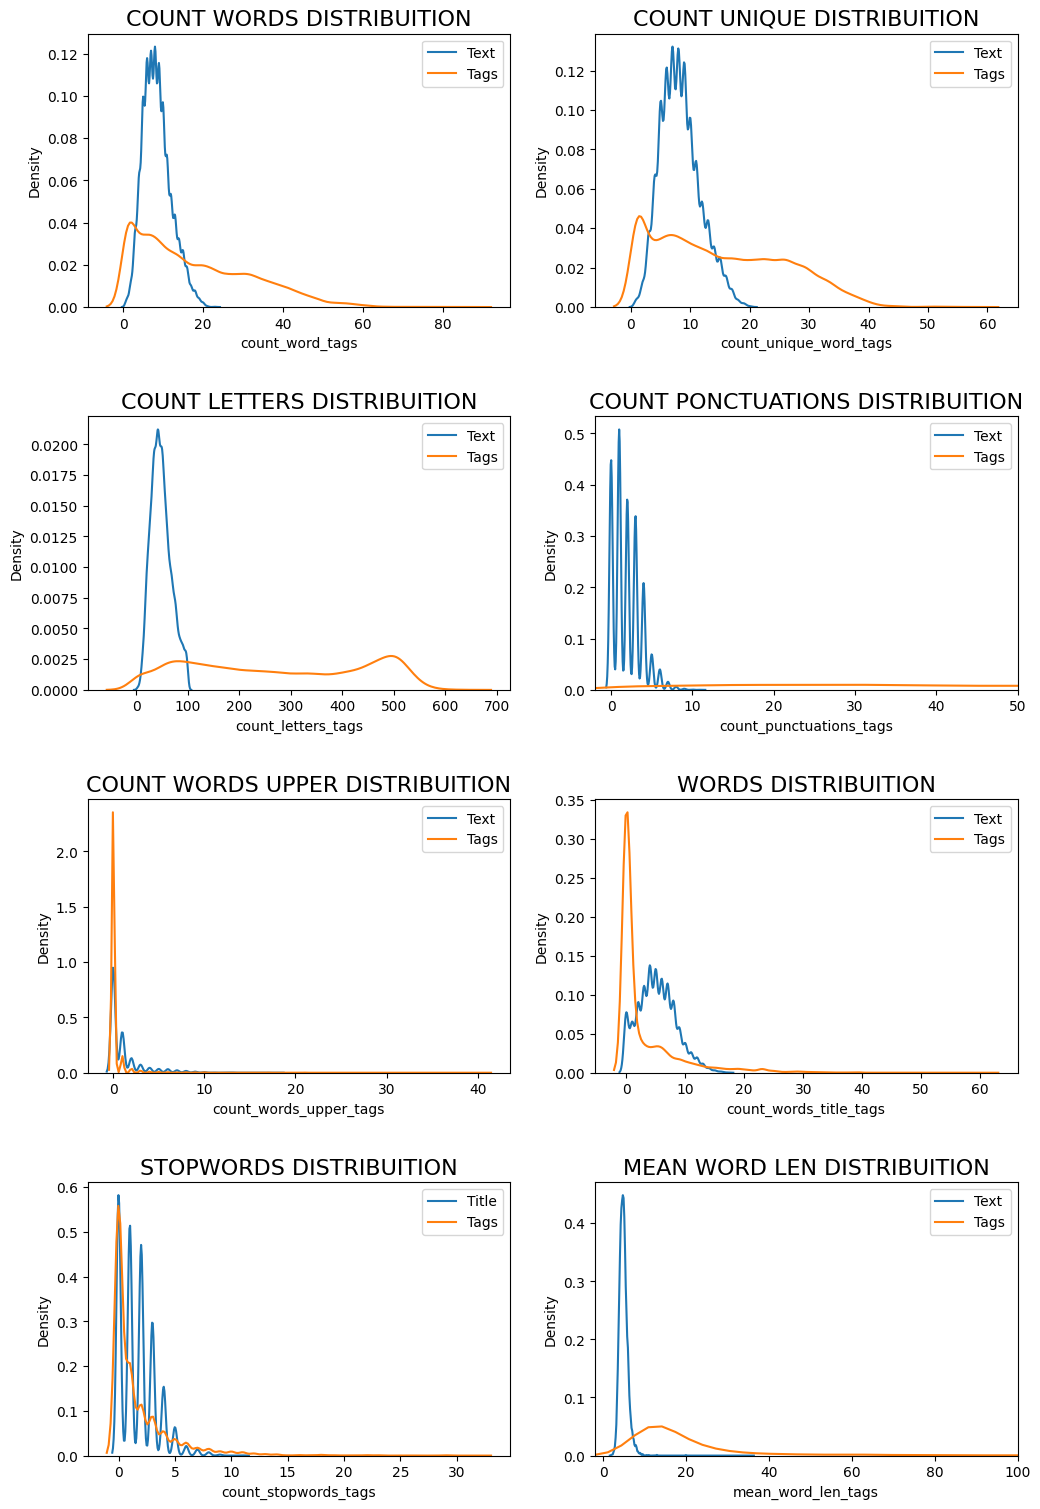

In [129]:
plt.figure(figsize = (12,18))

plt.subplot(421)
g1 = sns.distplot(df_yout['countword'], 
                  hist=False, label='Text')
g1 = sns.distplot(df_yout['count_word_tags'], 
                  hist=False, label='Tags')
g1.set_title("COUNT WORDS DISTRIBUITION", fontsize=16)
plt.legend()

plt.subplot(422)
g2=sns.distplot(df_yout['count_unique_word'],
                  hist=False, label='Text')
g2 = sns.distplot(df_yout['count_unique_word_tags'], 
                  hist=False, label='Tags')
g2.set_title("COUNT UNIQUE DISTRIBUITION", fontsize=16)
plt.legend()

plt.subplot(423)
g3 = sns.distplot(df_yout['count_letter'], 
                  hist=False, label='Text')
g3 = sns.distplot(df_yout['count_letters_tags'], 
                  hist=False, label='Tags')
g3.set_title("COUNT LETTERS DISTRIBUITION", fontsize=16)
plt.legend()

plt.subplot(424)
g4 = sns.distplot(df_yout["count_punctuations"], 
                  hist=False, label='Text')
g4 = sns.distplot(df_yout["count_punctuations_tags"], 
                  hist=False, label='Tags')
g4.set_xlim([-2,50])
g4.set_title('COUNT PONCTUATIONS DISTRIBUITION', fontsize=16)
plt.legend()

plt.subplot(425)
g5 = sns.distplot(df_yout["count_words_upper"] , 
                  hist=False, label='Text')
g5 = sns.distplot(df_yout["count_words_upper_tags"] , 
                  hist=False, label='Tags')
g5.set_title('COUNT WORDS UPPER DISTRIBUITION', fontsize=16)
plt.legend()

plt.subplot(426)
g6 = sns.distplot(df_yout["count_words_title"], 
                  hist=False, label='Text')
g6 = sns.distplot(df_yout["count_words_title_tags"], 
                  hist=False, label='Tags')
g6.set_title('WORDS DISTRIBUITION', fontsize=16)
plt.legend()

plt.subplot(427)
g7 = sns.distplot(df_yout["count_stopwords"], 
                  hist=False, label='Title')
g7 = sns.distplot(df_yout["count_stopwords_tags"], 
                  hist=False, label='Tags')
g7.set_title('STOPWORDS DISTRIBUITION', fontsize=16)
plt.legend()

plt.subplot(428)
g8 = sns.distplot(df_yout["mean_word_len"], 
                  hist=False, label='Text')
g8 = sns.distplot(df_yout["mean_word_len_tags"], 
                  hist=False, label='Tags')
g8.set_xlim([-2,100])
g8.set_title('MEAN WORD LEN DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.legend()
plt.show()

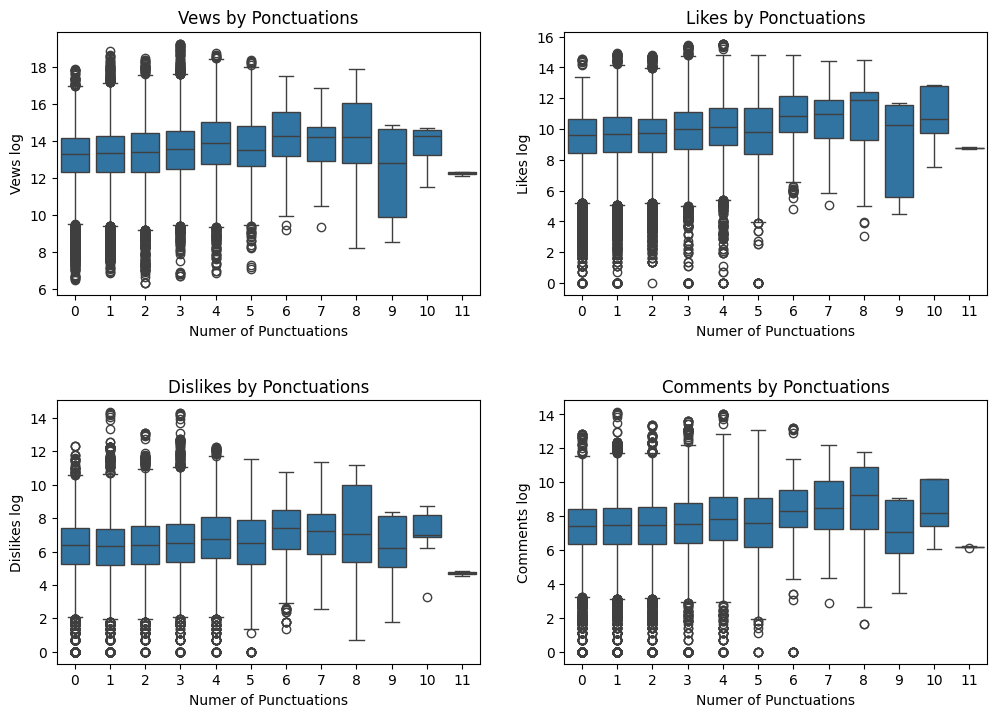

In [130]:
plt.figure(figsize = (12,8))

plt.subplot(221)
g=sns.boxplot(x='count_punctuations', y='views_log',data=df_yout)
g.set_title("Vews by Ponctuations")
g.set_xlabel("Numer of Punctuations")
g.set_ylabel("Vews log")

plt.subplot(222)
g1 = sns.boxplot(x='count_punctuations', y='likes_log',data=df_yout)
g1.set_title("Likes by Ponctuations")
g1.set_xlabel("Numer of Punctuations")
g1.set_ylabel("Likes log")

plt.subplot(223)
g2 = sns.boxplot(x='count_punctuations', y='dislikes_log',data=df_yout)
g2.set_title("Dislikes by Ponctuations")
g2.set_xlabel("Numer of Punctuations")
g2.set_ylabel("Dislikes log")

plt.subplot(224)
g3 = sns.boxplot(x='count_punctuations', y='comment_count_log',data=df_yout)
g3.set_title("Comments by Ponctuations")
g3.set_xlabel("Numer of Punctuations")
g3.set_ylabel("Comments log")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

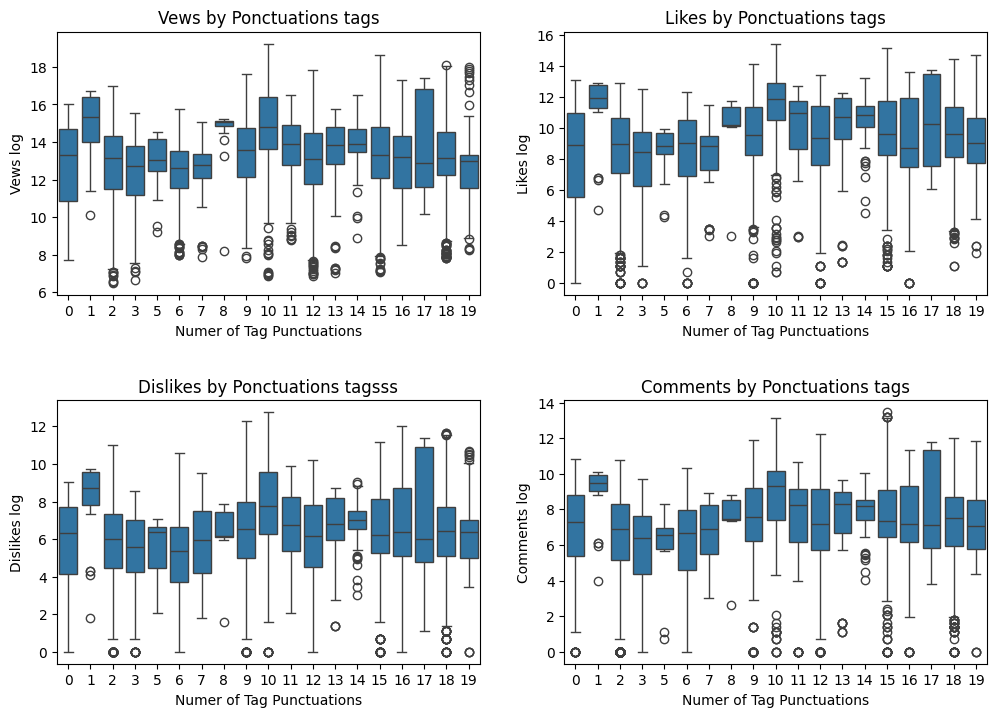

In [131]:
plt.figure(figsize = (12,8))

plt.subplot(221)
g=sns.boxplot(x='count_punctuations_tags', y='views_log',data=df_yout[df_yout['count_punctuations_tags'] < 20])
g.set_title("Vews by Ponctuations tags")
g.set_xlabel("Numer of Tag Punctuations")
g.set_ylabel("Vews log")

plt.subplot(222)
g1 = sns.boxplot(x='count_punctuations_tags', y='likes_log',data=df_yout[df_yout["count_punctuations_tags"]<20])
g1.set_title("Likes by Ponctuations tags")
g1.set_xlabel("Numer of Tag Punctuations")
g1.set_ylabel("Likes log")


plt.subplot(223)
g2 = sns.boxplot(x='count_punctuations_tags', y='dislikes_log',data=df_yout[df_yout['count_punctuations_tags'] < 20])
g2.set_title("Dislikes by Ponctuations tagsss")
g2.set_xlabel("Numer of Tag Punctuations")
g2.set_ylabel("Dislikes log")

plt.subplot(224)
g3 = sns.boxplot(x='count_punctuations_tags', y='comment_count_log',data=df_yout[df_yout['count_punctuations_tags'] < 20])
g3.set_title("Comments by Ponctuations tags")
g3.set_xlabel("Numer of Tag Punctuations")
g3.set_ylabel("Comments log")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

In [132]:
plt.figure(figsize = (12,8))

sns.heatmap(df_yout[['countword', 'count_unique_word','count_letter',
                     "count_punctuations","count_words_upper", "count_words_title", 
                     "count_stopwords","mean_word_len", 
                     'views_log', 'likes_log','dislikes_log','comment_count_log',
                     'ratings_disabled', 'comments_disabled', 'video_error_or_removed']].corr(), annot=True)
plt.show()

In [133]:
mpl.rcParams['font.size']= 15              
mpl.rcParams['savefig.dpi']= 100         
mpl.rcParams['figure.subplot.bottom']= .1 

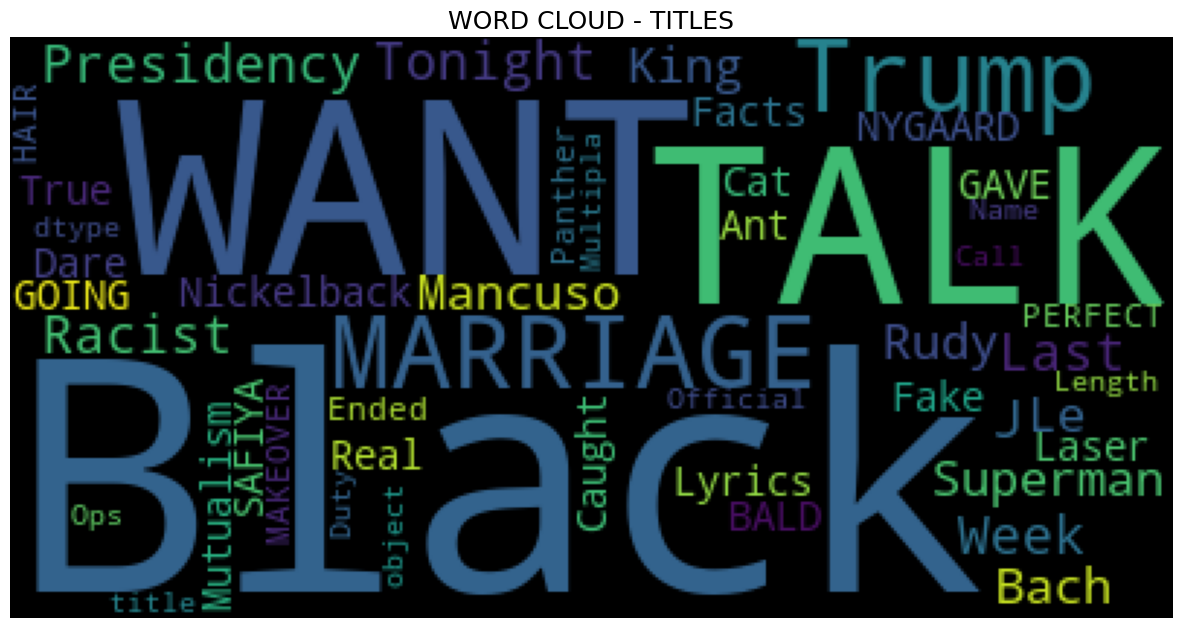

In [134]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud( ).generate(str(df_yout['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()


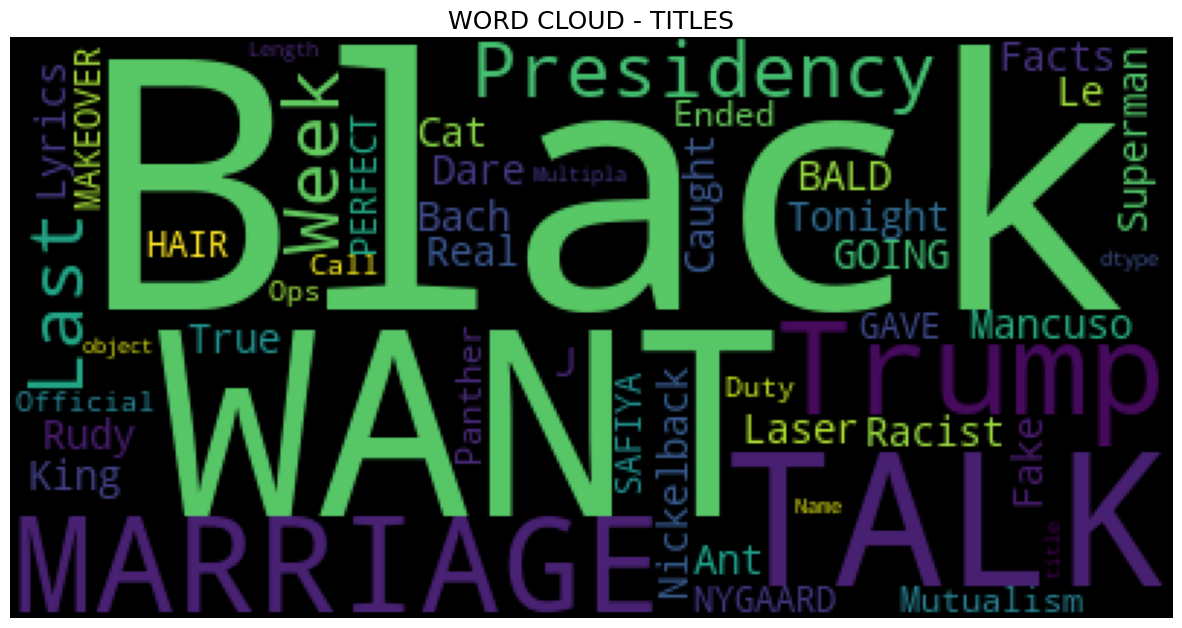

In [135]:

plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_yout['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()






In [136]:
malli=pd.read_csv("sales1.csv")

In [137]:
malli

Order ID Customer Name                 Product  Quantity
0      166837         Veeru  34in Ultrawide Monitor         2
1      166838         Tarun             Samsung m10         3
2      166839         Kedar            20in Monitor         1
3      166840       Lavanya               iPhone 11         3
4      166841          Venu      Macbook Pro Laptop         2
..        ...           ...                     ...       ...
595    167403        Balaji      Macbook Pro Laptop         1
596    167404       Lavanya         ThinkPad Laptop         1
597    167405          Venu           Flatscreen TV         1
598    167406        Siddhu             Samsung m20         2
599    167407         Tarun      LG Washing Machine         1

[600 rows x 4 columns]

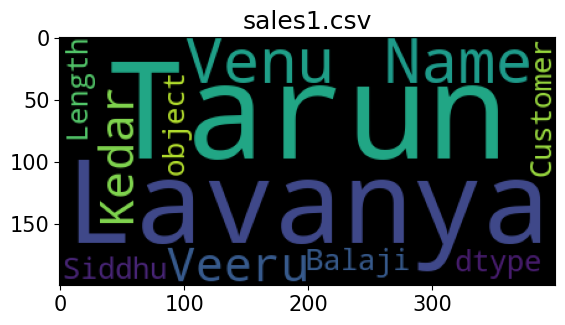

In [138]:
d=WordCloud(random_state=42)
g=d.generate(str(malli["Customer Name"]))
plt.imshow(g)
plt.title("sales1.csv")
plt.show()

In [139]:
malli["Customer Name"].value_counts()

Customer Name
Harsha          34
Karteek         33
Siddhu          33
Venki           32
Lavanya         31
Pradhan         30
Veeru           29
Sumanth         29
Kedar           29
Vijay           27
Venu            27
Nireekshan      26
Mallikarjun     25
Chaithanya      25
Jaya Chandra    24
Madhurima       24
Sagar           23
Partha          22
Vinay           21
Balaji          21
Tarun           20
Neelima         20
Shahid          15
Name: count, dtype: int64

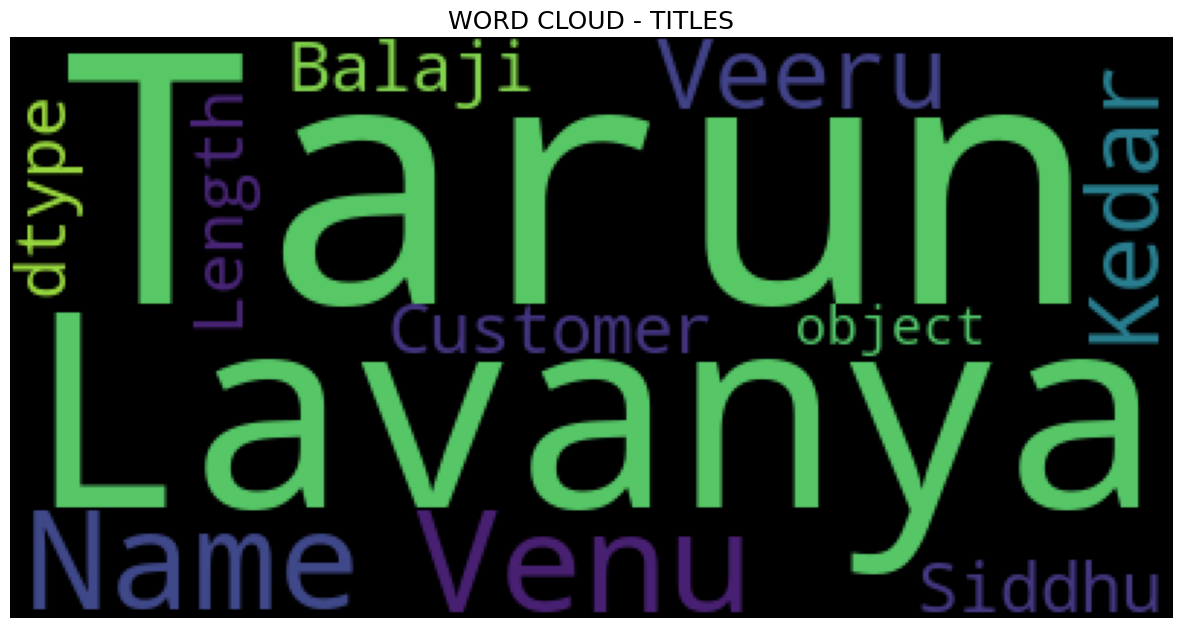

In [140]:
plt.figure(figsize = (15,15))
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(malli["Customer Name"]))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

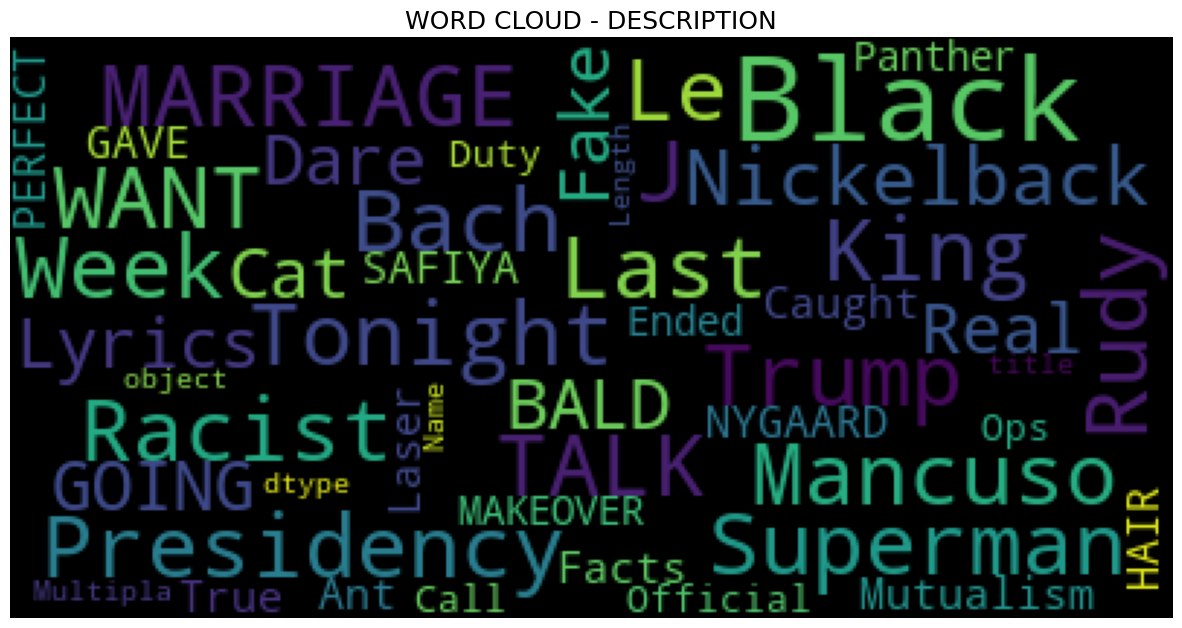

In [141]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=150,
                         
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_yout['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()

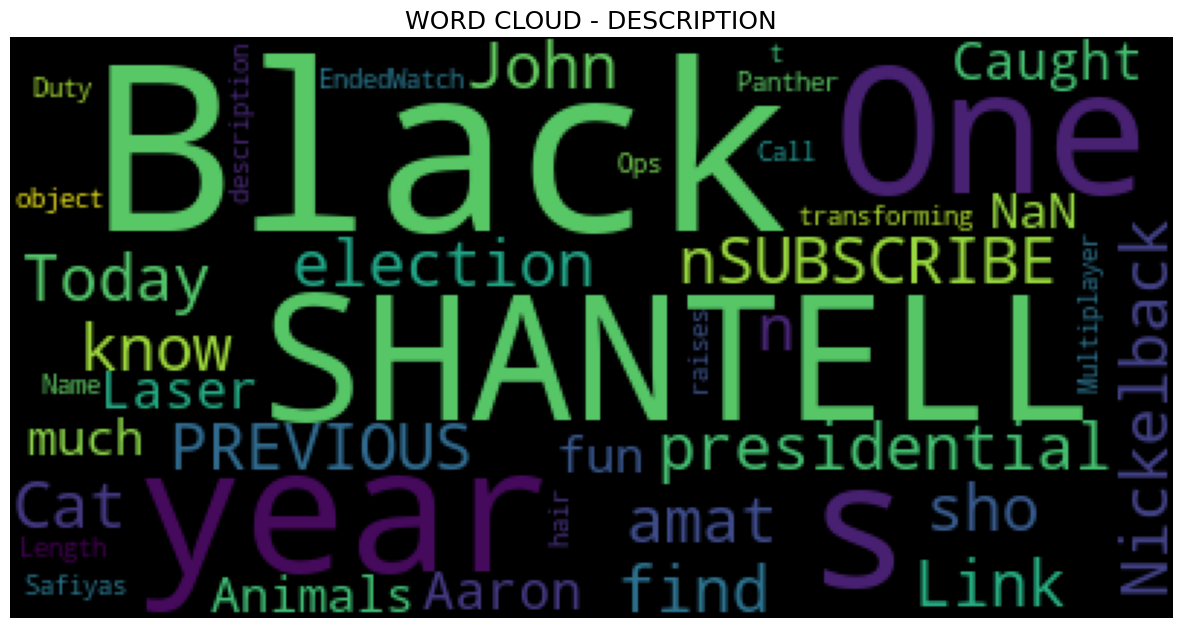

In [144]:
plt.figure(figsize=(15,8))
Stopwords = set(STOPWORDS)

newStopWords= ['https', 'youtube', 'VIDEO','youtu','CHANNEL', 'WATCH',"dtype"]

stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=80, 
                          random_state=42
                         ).generate(str(df_yout['description']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()

In [143]:
df_yout['description']

0        SHANTELL'S CHANNEL - https://www.youtube.com/s...
1        One year after the presidential election, John...
2        WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3        Today we find out if Link is a Nickelback amat...
4        I know it's been a while since we did this sho...
                               ...                        
40944       The Cat Who Caught the Laser - Aaron's Animals
40945                                                  NaN
40946    I had so much fun transforming Safiyas hair in...
40947    How Black Panther Should Have EndedWatch More ...
40948    Call of Duty: Black Ops 4 Multiplayer raises t...
Name: description, Length: 40949, dtype: object

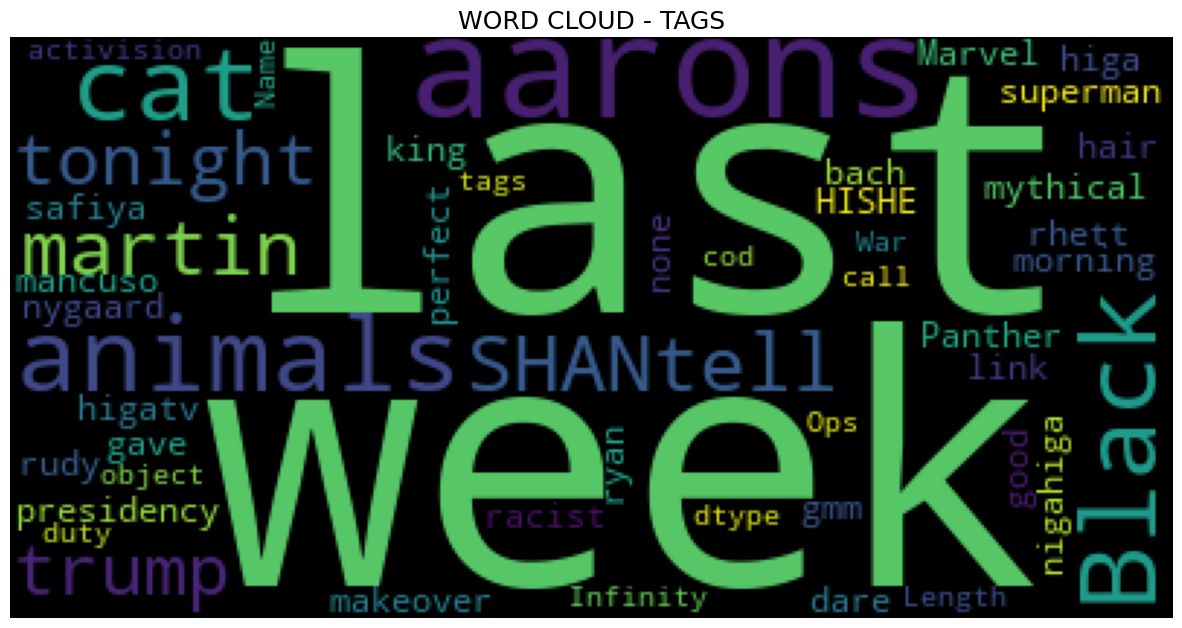

In [161]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=100000000,
                         
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_yout['tags']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show()

In [163]:
df_yout['publish_time'] 

0        2017-11-13T17:13:01.000Z
1        2017-11-13T07:30:00.000Z
2        2017-11-12T19:05:24.000Z
3        2017-11-13T11:00:04.000Z
4        2017-11-12T18:01:41.000Z
                   ...           
40944    2018-05-18T13:00:04.000Z
40945    2018-05-18T01:00:06.000Z
40946    2018-05-18T17:34:22.000Z
40947    2018-05-17T17:00:04.000Z
40948    2018-05-17T17:09:38.000Z
Name: publish_time, Length: 40949, dtype: object

In [164]:
df_yout['publish_time'] = pd.to_datetime(df_yout['publish_time'])

In [165]:
df_yout.dtypes

video_id                                 object
trending_date                            object
title                                    object
channel_title                            object
category_id                               int64
publish_time                datetime64[ns, UTC]
tags                                     object
views                                     int64
likes                                     int64
dislikes                                  int64
comment_count                             int64
thumbnail_link                           object
comments_disabled                          bool
ratings_disabled                           bool
video_error_or_removed                     bool
description                              object
likes_log                               float64
views_log                               float64
dislikes_log                            float64
comment_count_log                       float64
category_name                           

In [166]:
df_yout['publish_time'] = pd.to_datetime(df_yout['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [167]:
df_yout.dtypes

video_id                                 object
trending_date                            object
title                                    object
channel_title                            object
category_id                               int64
publish_time                datetime64[ns, UTC]
tags                                     object
views                                     int64
likes                                     int64
dislikes                                  int64
comment_count                             int64
thumbnail_link                           object
comments_disabled                          bool
ratings_disabled                           bool
video_error_or_removed                     bool
description                              object
likes_log                               float64
views_log                               float64
dislikes_log                            float64
comment_count_log                       float64
category_name                           

In [168]:
df_yout["month"]=df_yout["publish_time"].dt.month

In [169]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22 2017-11-13 17:13:01+00:00   
1           24 2017-11-13 07:30:00+00:00   
2           23 2017-11-12 19:05:24+00:00   
3           24 2017-11-13 11:00:04+00:00   
4           24 2017-11-12 18:01:41+00:00   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  count_words_title_tags count_stopwords  \
0      2966  ...                       0               4   
1      6146  ...                       0               2   
2      5339  ...                       4               0   
3       666  ...                       0               1   
4      1989  ...                       0               1   

   count_stopwords_tags  mean_word_len  mean_word_len_tags  \
0                     0            4.0            7.000000   
1                     0            5.3            7.583333   
2                     2            4.4           15.578947   
3                     4            5.6           13.058824   
4                     0            4.0           29.250000   

  word_unique_percent  word_unique_percent_tags  punct_percent  \
0               100.0                100.000000            0.0   
1               100.0                 83.333333           30.0   
2               100.0                100.000000           30.0   
3               100.0                 82.352941           40.0   
4               100.0                100.000000           60.0   

   punct_percent_tags  month  
0            0.000000     11  
1           75.000000     11  
2          342.105263     11  
3          247.058824     11  
4          975.000000     11  

[5 rows x 45 columns]

In [170]:
print("category name count")
print(df_yout["month"].value_counts())

category name count
month
5     6681
2     6207
12    6182
3     6175
1     5502
4     5092
11    4209
6      769
10      62
9       34
8       26
7       10
Name: count, dtype: int64


In [171]:
print(df_yout["month"].value_counts()[:5])

month
5     6681
2     6207
12    6182
3     6175
1     5502
Name: count, dtype: int64


In [187]:
plt.figure(figsize=(15,6))
plt.subplot(211)
g = sns.countplot(x='month', data=df_yout, palette="Set1")


g.set_xticklabels(g.get_xticklabels(),rotation=45)

g.set_title("Counting Months ", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(212)
g1 = sns.boxenplot(x='month', y='likes_rate', data=df_yout, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Like Rate by Month", fontsize=20)
g1.set_xlabel("Months", fontsize=15)
g1.set_ylabel("Like Rate(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()


In [197]:
df_yout[['hour','min','sec']] = df_yout['publish_time'].astype(str).str.split(':', expand=True).astype(int)

In [195]:
df_yout.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

  publish_date  category_id publish_time  \
0   2017-11-13           22     17:13:01   
1   2017-11-13           24     07:30:00   
2   2017-11-12           23     19:05:24   
3   2017-11-13           24     11:00:04   
4   2017-11-12           24     18:01:41   

                                                tags    views   likes  ...  \
0                                    SHANtell martin   748374   57527  ...   
1  last week tonight trump presidency|"last week ...  2418783   97185  ...   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033  ...   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172  ...   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235  ...   

   mean_word_len  mean_word_len_tags word_unique_percent  \
0            4.0            7.000000               100.0   
1            5.3            7.583333               100.0   
2            4.4           15.578947               100.0   
3            5.6           13.058824               100.0   
4            4.0           29.250000               100.0   

   word_unique_percent_tags  punct_percent  punct_percent_tags month  hour  \
0                100.000000            0.0            0.000000    11    17   
1                 83.333333           30.0           75.000000    11     7   
2                100.000000           30.0          342.105263    11    19   
3                 82.352941           40.0          247.058824    11    11   
4                100.000000           60.0          975.000000    11    18   

   min  sec  
0   13    1  
1   30    0  
2    5   24  
3    0    4  
4    1   41  

[5 rows x 49 columns]

In [201]:
df_yout['hour'].value_counts()

hour
16    3669
15    3483
17    3447
18    2889
14    2807
20    2136
19    2132
13    2105
21    2104
22    1959
12    1551
23    1495
0     1436
1     1318
4     1262
5     1253
3      944
2      936
11     856
8      790
7      700
9      605
10     541
6      531
Name: count, dtype: int64

TOP 5 Hour values
hour
16    3669
15    3483
17    3447
18    2889
14    2807
Name: count, dtype: int64


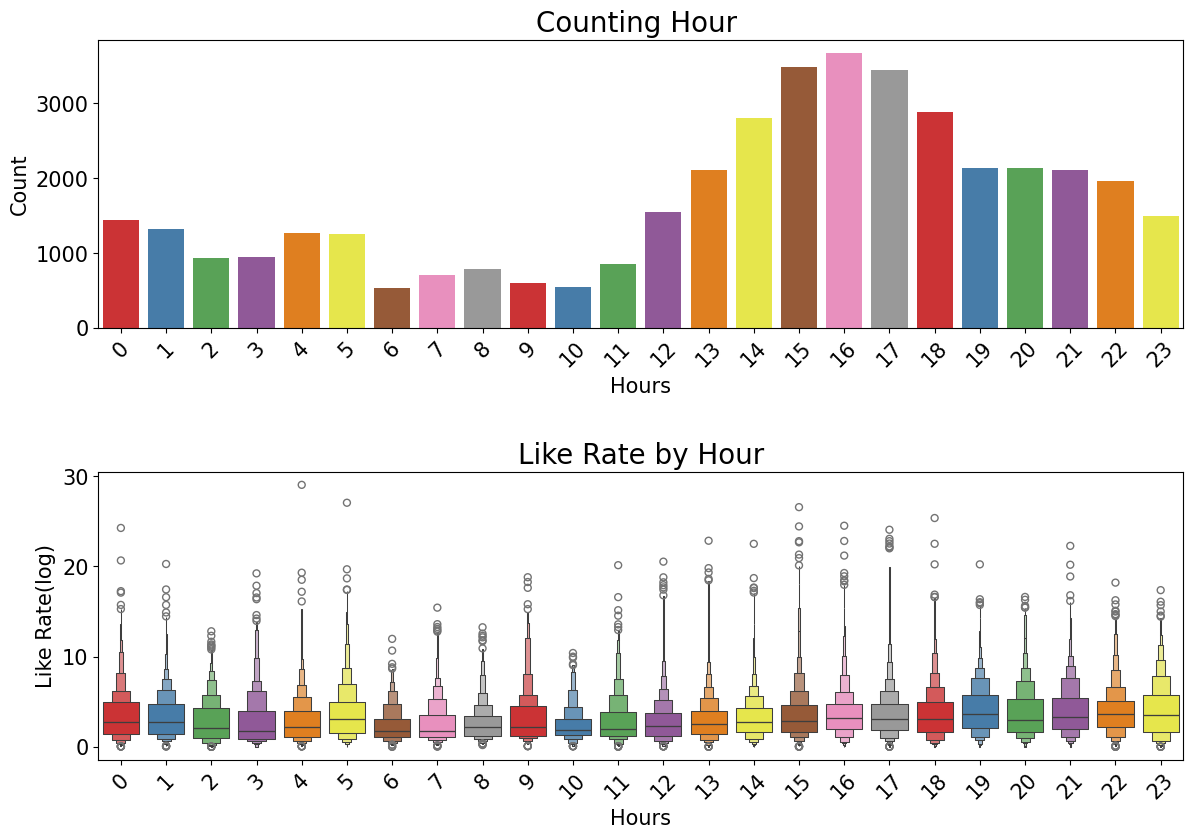

In [205]:
print("TOP 5 Hour values")
print(df_yout['hour'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot(x='hour', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Hour ", fontsize=20)
g.set_xlabel("Hours", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(212)
g1 = sns.boxenplot(x='hour', y='likes_rate', data=df_yout, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Like Rate by Hour", fontsize=20)
g1.set_xlabel("Hours", fontsize=15)
g1.set_ylabel("Like Rate(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()